<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 2</font></h1>


<h2> Group 4 <h2>

- Gilbert Aryaduta Pinem
- Dian Pramesti
- Irfan Musa
- Koriatul Qibtiah

PYTN-KS-011 <br> 
Studi Independen - Kampus Merdeka

# 1. PERKENALAN

## 1.1 Latar Belakang


Cuaca memainkan peran yang sangat penting dalam kehidupan manusia. Berbagai aktivitas sehari-hari manusia sangat tergantung pada kondisi cuaca. Oleh karena itu, prakiraan cuaca menjadi sangat penting bagi manusia agar dapat merencanakan aktivitas mereka dengan baik. Beberapa faktor alam yang dapat mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, dan kecepatan angin. Di antara fenomena cuaca yang sangat memengaruhi kehidupan manusia adalah hujan. Oleh karena itu, diperlukan suatu analisis dan model yang dapat memprediksi kemungkinan terjadinya hujan agar manusia dapat mengatur aktivitas mereka secara lebih efektif.

## 1.2 Dataset

Dataset yang digunakan adalah dataset yang berjudul Rain in Australia yang berasal diambil dari website kaggle <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Rain in Australia">Rain in Australia</a>

Dataset ini berisi tentang histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut. 

RainTommorow akan menjadi target variable yang akan diprediksi. Itu berarti apakah besok akan hujan, Ya atau Tidak? Kolom ini akan berisikan Ya apabila hujan di hari itu lebih dari atau sama dengan 1mm

## 1.3 Objektif yang ingin dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ini adalah :

- Mengetahui faktor-faktor apa saja yang mempengaruhi cuaca di kemudian hari
- Memprediksi apakah akan terjadi hujan di suatu tempat berdasarkan faktor-faktor yang mempengaruhi dengan menggunakan motode Logistic Regression dan SVM(Support Vector Machine)

# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

## 2.1 Import Pustaka

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

Dataset yang digunakan adalah weatherAUS.csv

## 3.1 Proses Data Loading

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 94.3MB/s]


In [3]:
## Read Dataset
df = pd.read_csv('weatherAUS.csv')
## Menampilkan Dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## 3.2 Eksplorasi Data Sederhana

In [ ]:
## Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dataset ini memiliki tipe data yang beragam yaitu float, object, dan integer.

Dapat juga dilihat pada informasi di atas, terdapat cukup banyak missing value yang ada pada tiap kolom tersebut. Hal itu dapat dilihat dari ketidak sesuaian jumlah nilai Non-Null pada seiap kolom

In [ ]:
## Melihat bentuk dari dataset
df.shape

(145460, 23)

Dataset ini memiliki 23 kolom dan 145460 baris

In [ ]:
## Melihat 5 Data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
## Melihat 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Ternyata pada dataset ini sudah terurut secara alfabel untuk lokasi yang dilakukan observasi, sehingga data teratas dan terbawah merupakan berdasarkan urutan abjad pada kolom **Location**

In [ ]:
## Mengelompokkan tiap kolom berdasarkan kategorikal dan numerikal

# Variabel bertipe kategorik
categorical = list(df.select_dtypes(include=['object']).columns)

# Variabel bertipe numerik
numerical = list(df.select_dtypes(exclude=['object']).columns)


In [ ]:
## Menampilkan kolom-kolom kategorikal dan numerikal
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
## Melihat jumlah Yes dan No pada kolom **RainTomorrow**
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
## Mengecek missing values pada dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
## Menghitung persentase missing values pada setiap atribut yang bersifat numerikal
df[numerical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

MaxTemp           0.87 %
MinTemp           1.02 %
WindSpeed9am      1.21 %
Temp9am           1.21 %
Humidity9am       1.82 %
Pressure3pm      10.33 %
Pressure9am      10.36 %
WindSpeed3pm      2.11 %
Rainfall          2.24 %
Temp3pm           2.48 %
Humidity3pm        3.1 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
dtype: object

Dari hasil perhitungan di atas, terdapat beberapa atribut yang memiliki persentase missing values yang cukup besar, diantaranya :

- Cloud9am    : 38.42 %
- Cloud3pm    : 40.81 %
- Evaporation : 43.17 %
- Sunshine    : 48.01 %

In [ ]:
## Menghitung persentase missing values pada setiap atribut yang bersifat kategorikal
df[categorical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

Date             0.0 %
Location         0.0 %
RainToday       2.24 %
RainTomorrow    2.25 %
WindDir3pm      2.91 %
WindGustDir      7.1 %
WindDir9am      7.26 %
dtype: object

Sementara untuk atribut yang bersifat kategorikal, persentase missing values pada tiap atribut terbilang kecil karna tidak ada yang mencapai 10 %

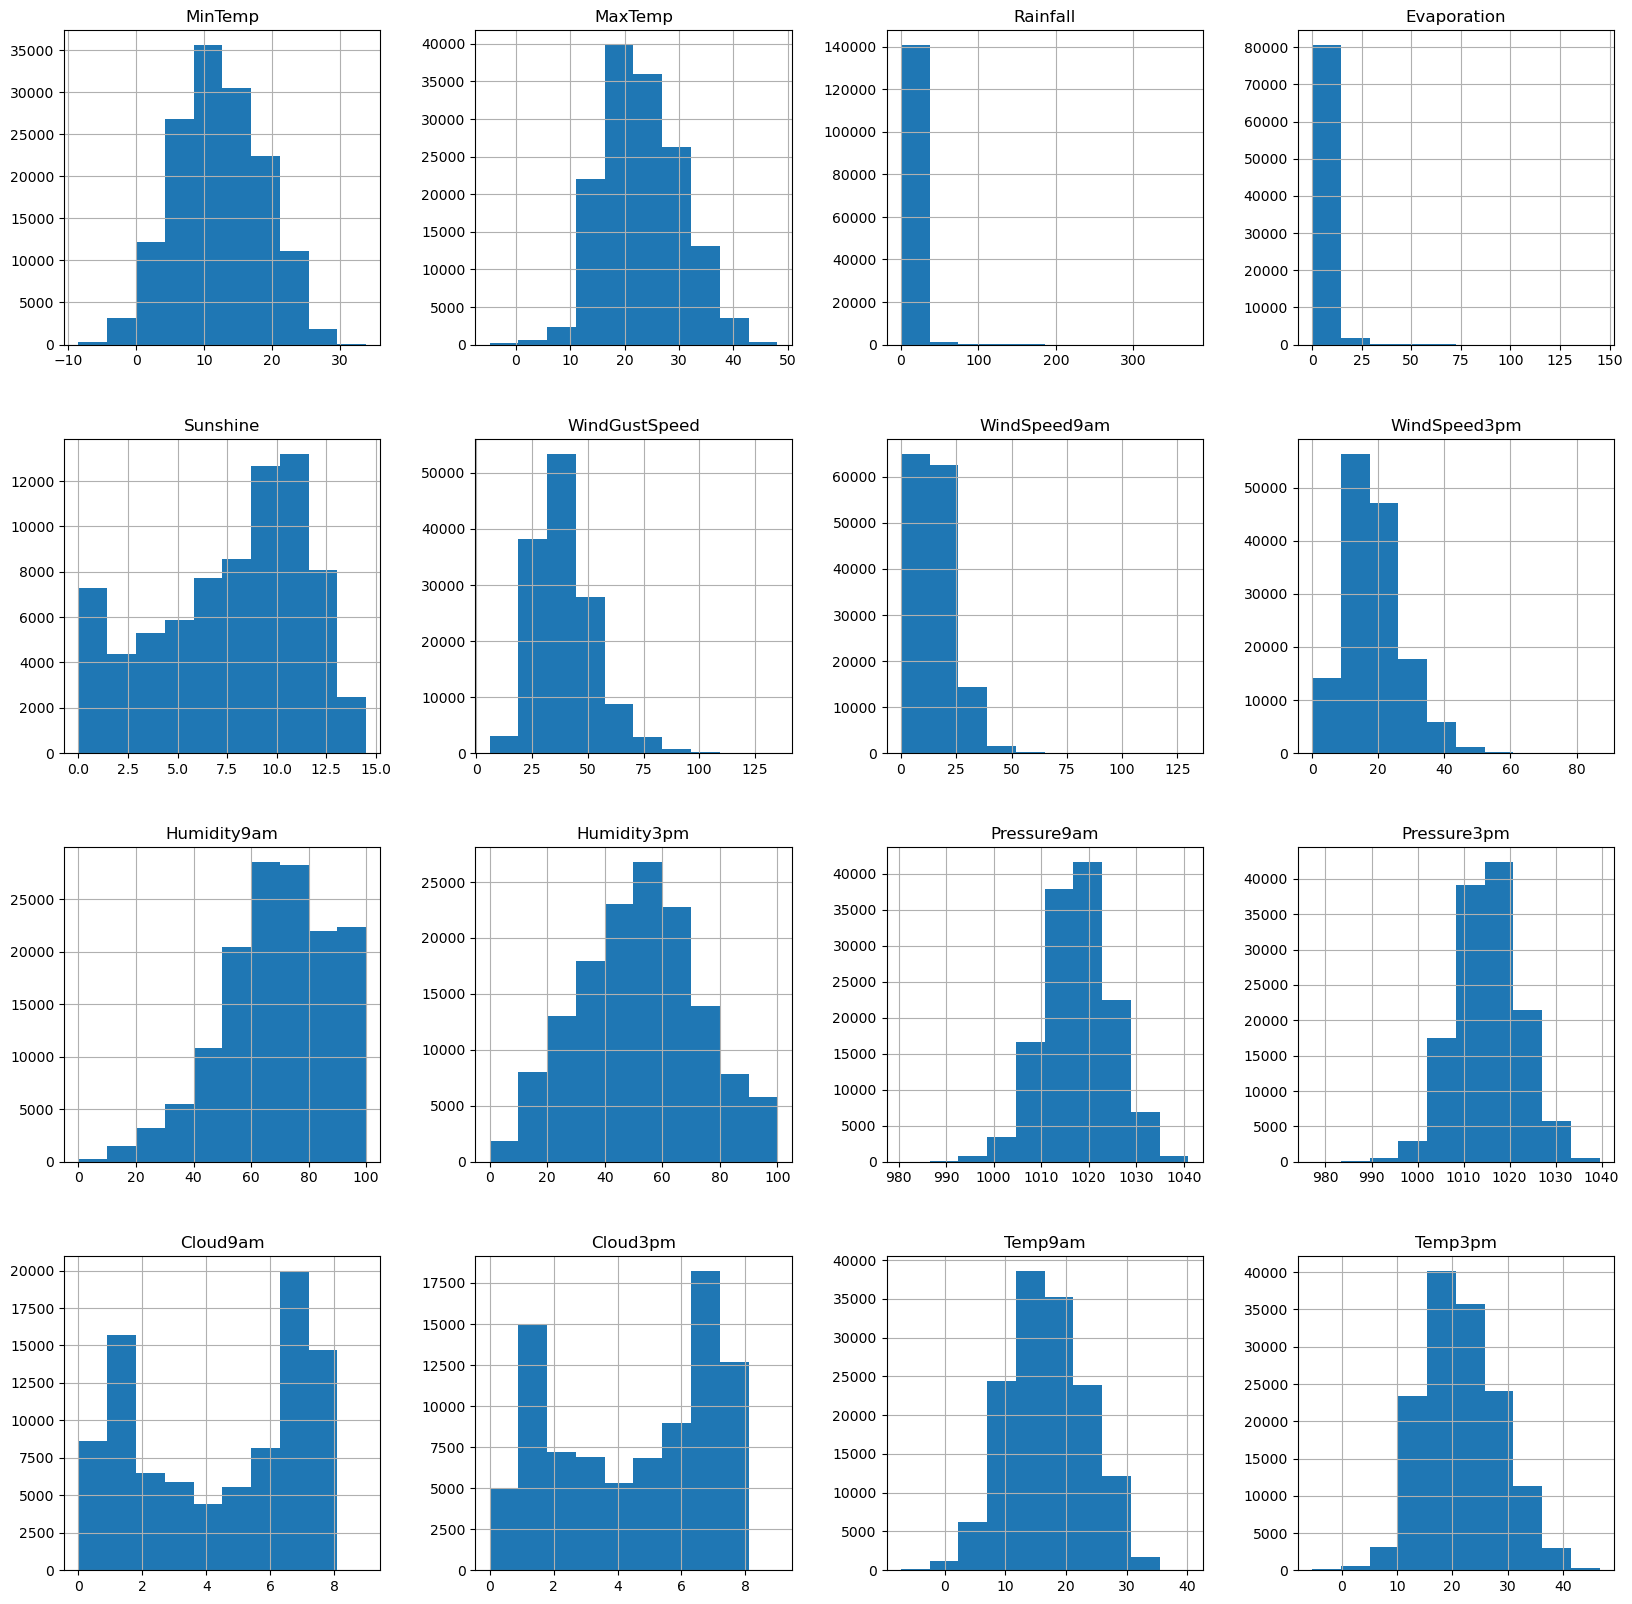

In [ ]:
## Membuat histogram untuk melihat distribusi dari nilai untuk setiap atribut numerikal
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan histogram yang sudah dibuat dari tiap atribut numerikal, terlihat sebagian besar nilai pada tiap atribut memiliki distribusi nornal. Sedangkan sisanya memiliki nilai skewness yang cukup tinggi

Membuat lineplot untuk meilihat korelasi antara atribut **Sunshine** dengan **Rainfall** dan atribut **Sunshine** dengan **Evaporation**

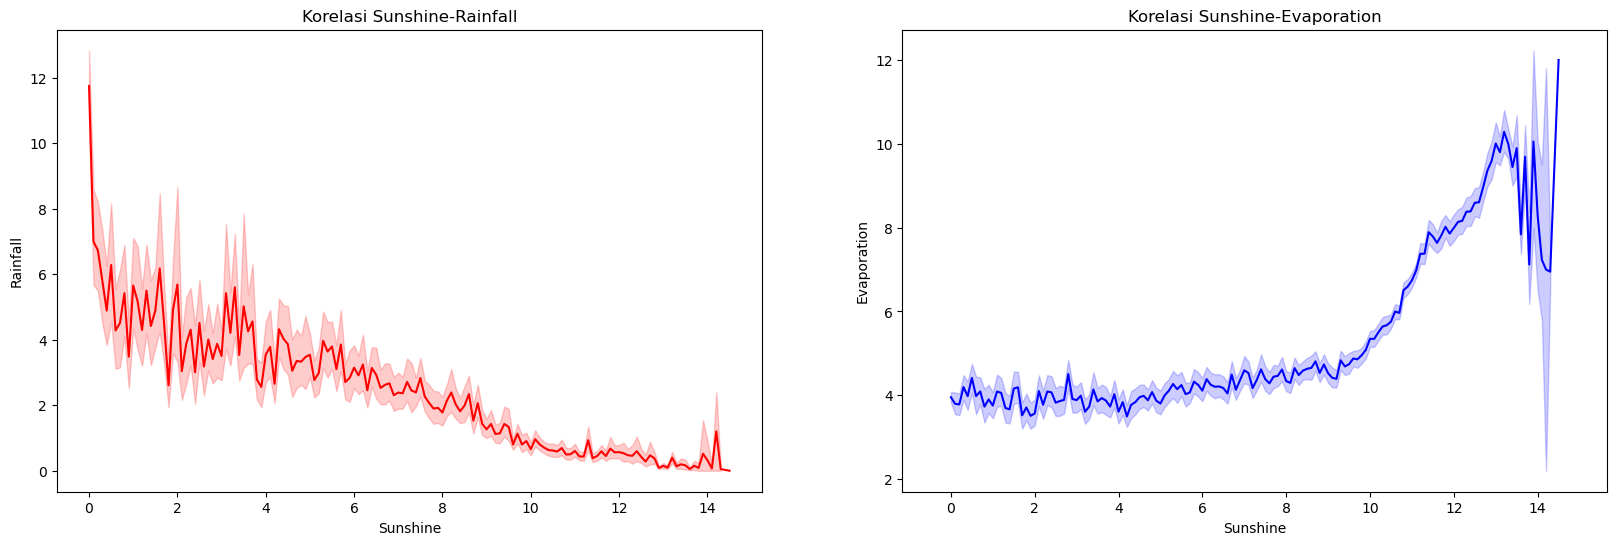

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.title("Korelasi Sunshine-Rainfall")
sns.lineplot(data=df, x='Sunshine',y='Rainfall', color='red')

plt.subplot(122)
plt.title("Korelasi Sunshine-Evaporation")
sns.lineplot(data=df, x='Sunshine', y='Evaporation', color='blue')

plt.axis('equal')
plt.show()

Dapat dilihat dari lineplot di atas, bahwa atribut **Sunshine** memiliki korelasi yang berbanding terbalik dengan **Rainfall**, yang mana semakin tinggi nilai **Rainfall**(curah hujan), maka akan semakin kecil nilai **Sunshine**(intensitas cahaya matahari), dan sebaliknya.

Sedangkan korelasi antara **Sunshine** dan **Evaporation** memiliki nilai yang berbanding lurus, yang mana apabila intensitas matahari tinggi, maka akan tinggi juga nilai penguapan

In [ ]:
## Melihat deskripsi statistik dasar dari tiap atribut numerikal
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
## Melihat deskripsi statistik dasar dari tiap atribut kategorikal
df[categorical].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# 4. DATA CLEANING

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
## Memgubah data pada atribut Date menjadi data dengan format datetime
df['Date'] = pd.to_datetime(df['Date'])

## Melakukan pemisahan terhadap atribut Date, menjadi Day, Month, dan Year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

## Melakukan penghapusan terhadap atribut Date
df.drop('Date', axis = 1, inplace = True)


In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [ ]:
## Melakukan pengecekan duplikasi data
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset

## 4.1 Handling Outliers

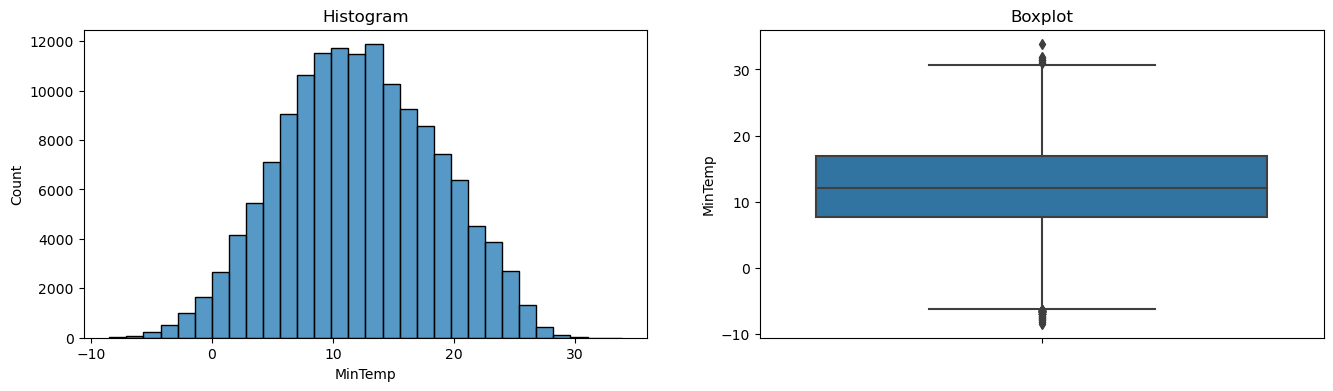

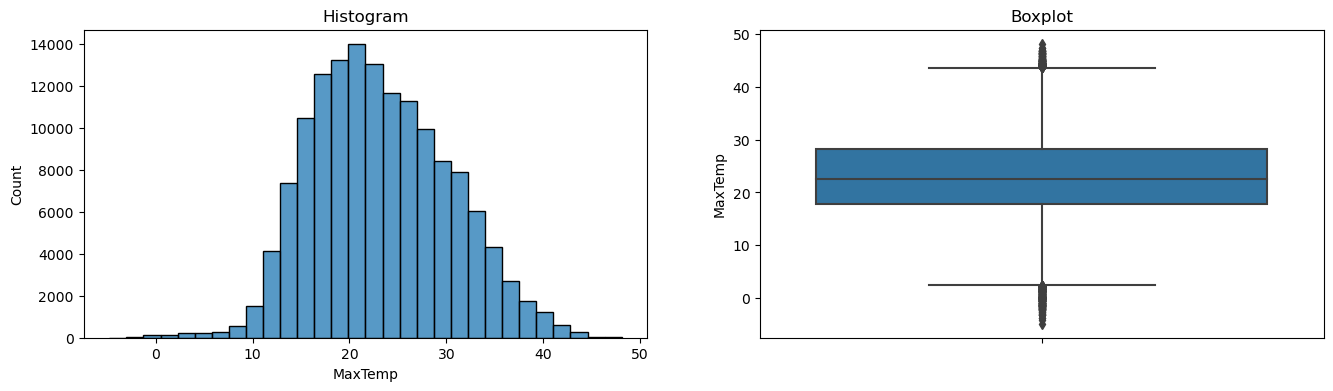

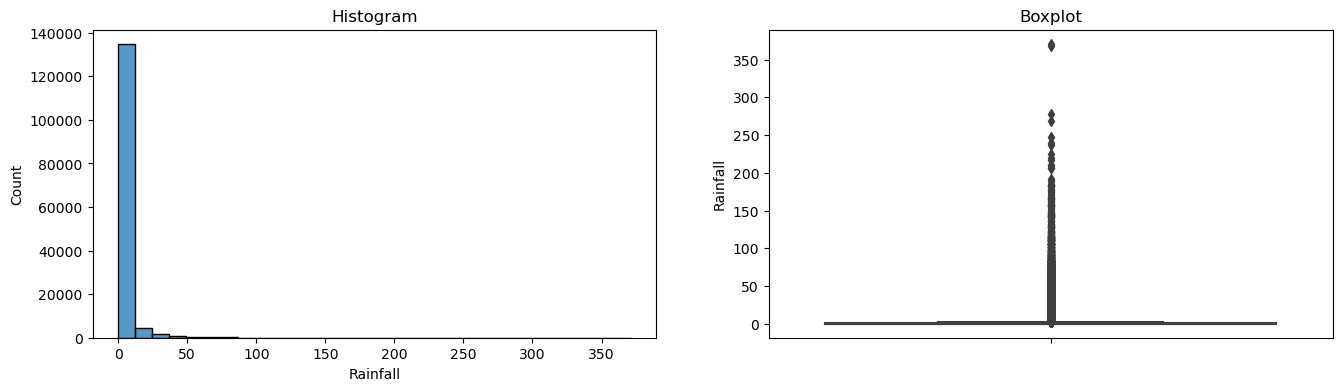

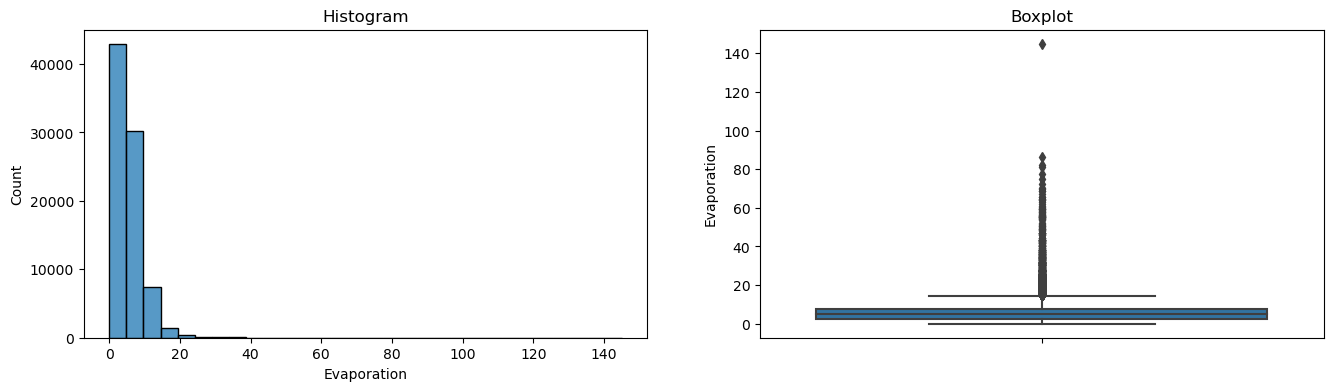

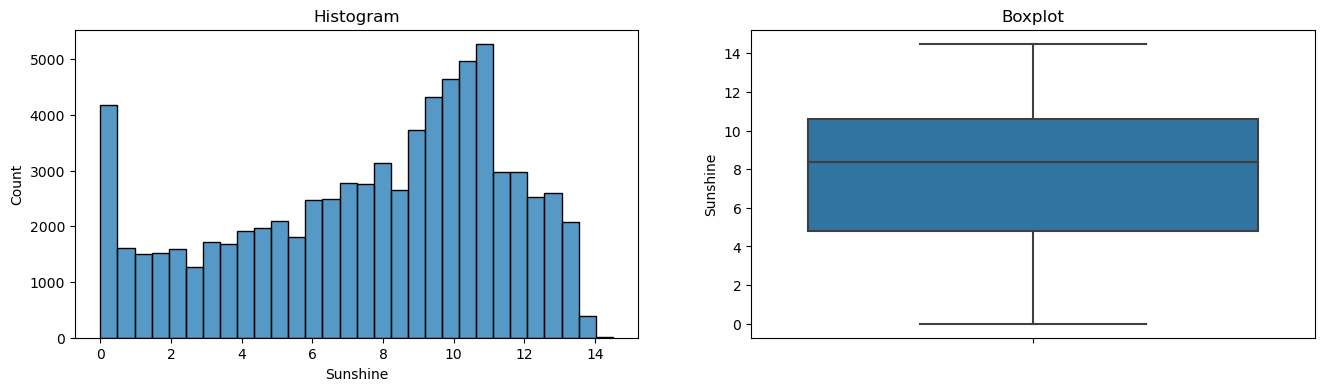

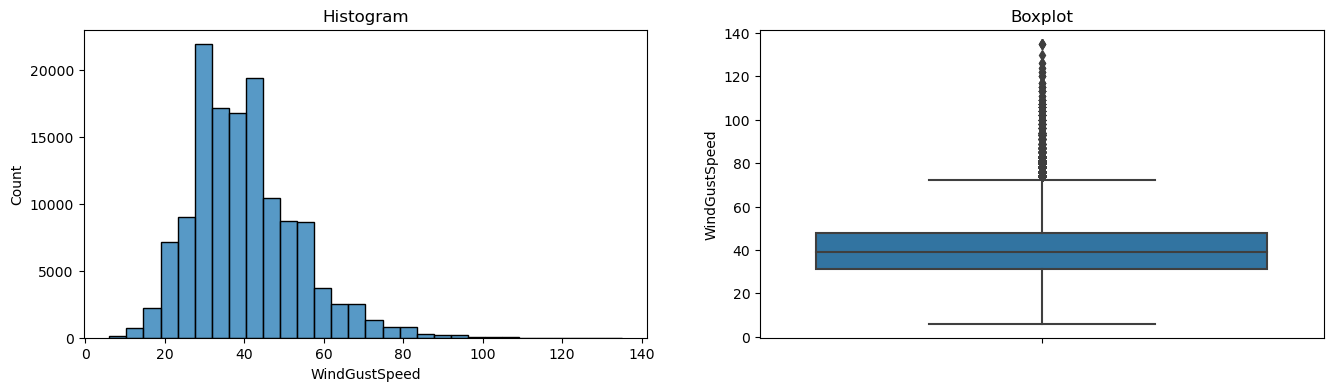

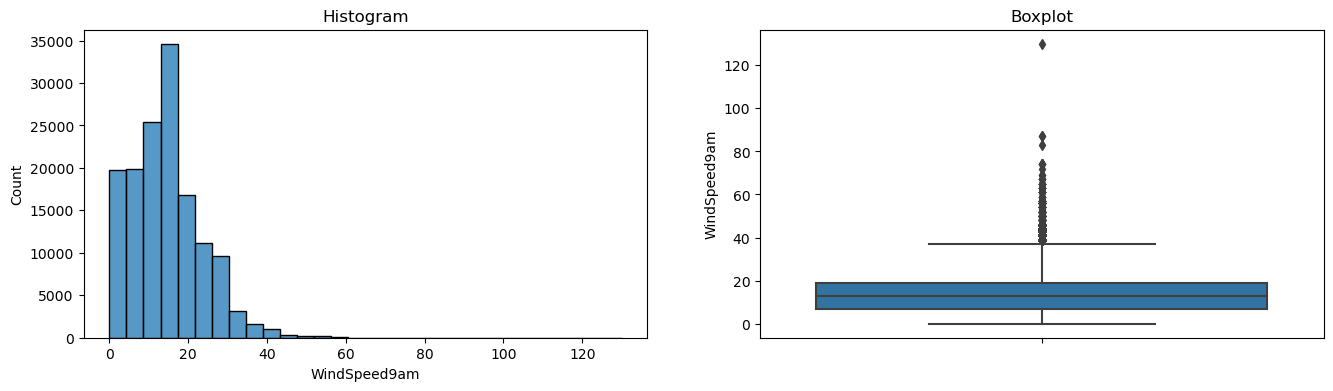

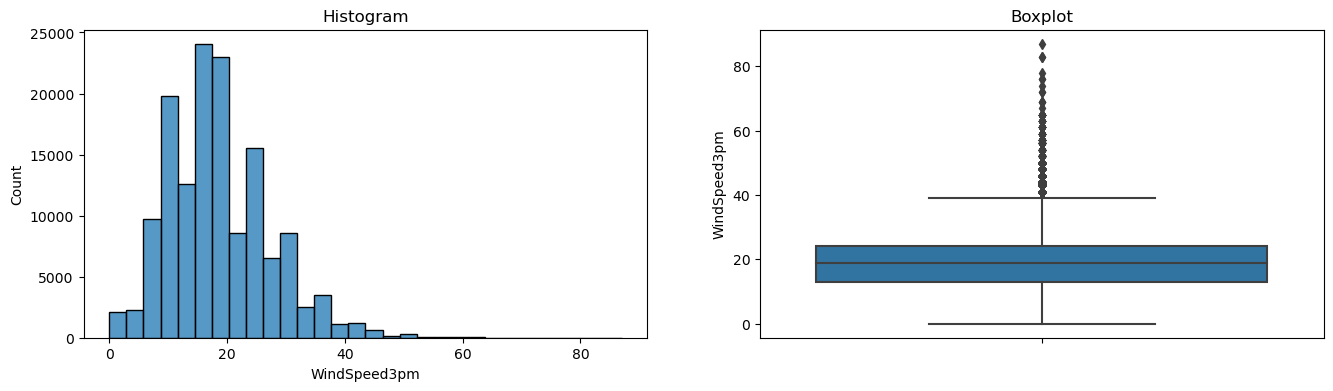

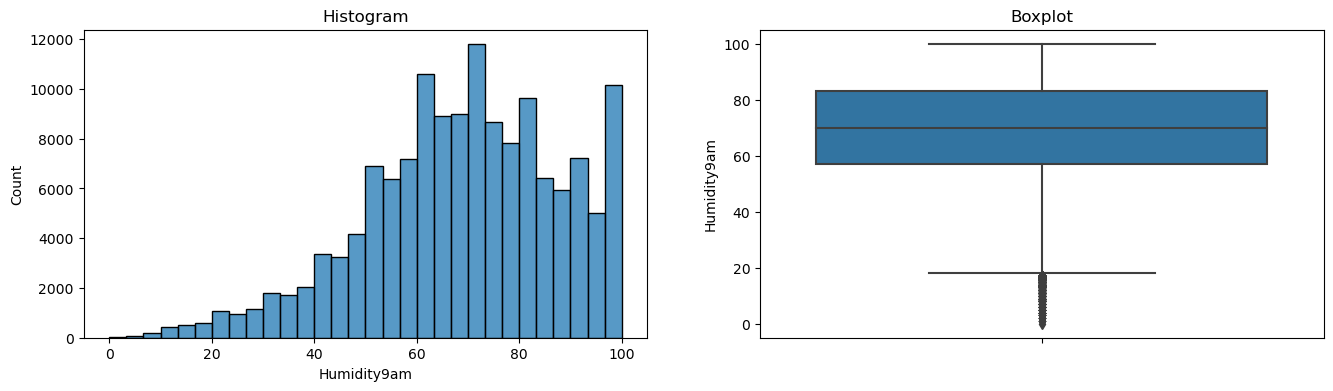

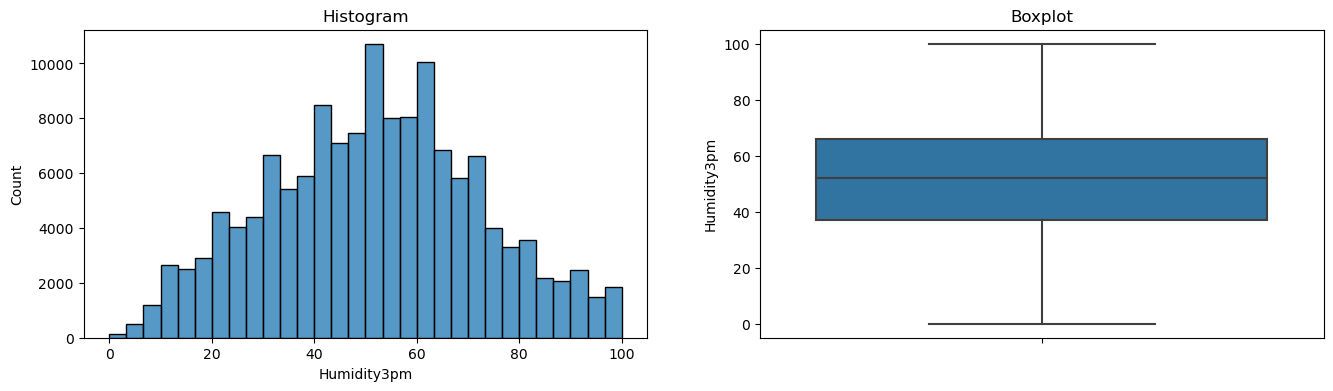

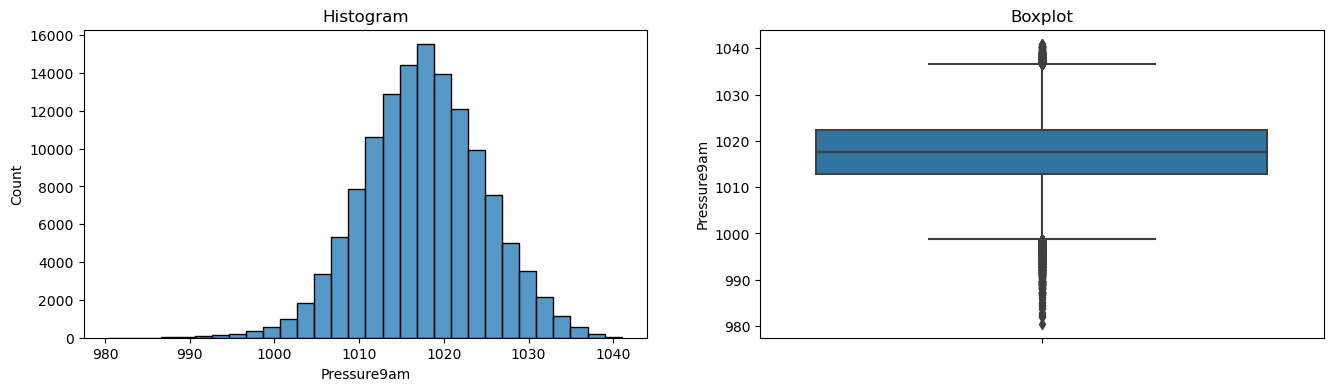

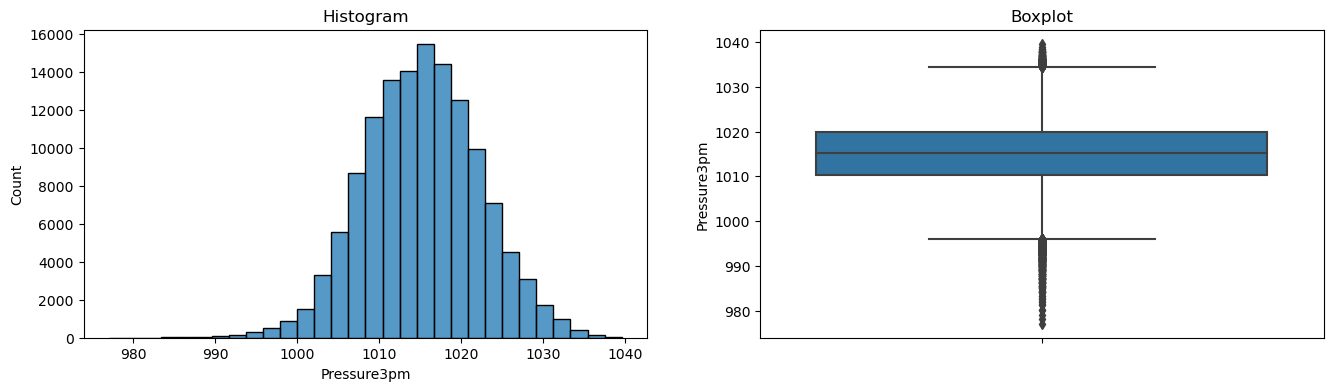

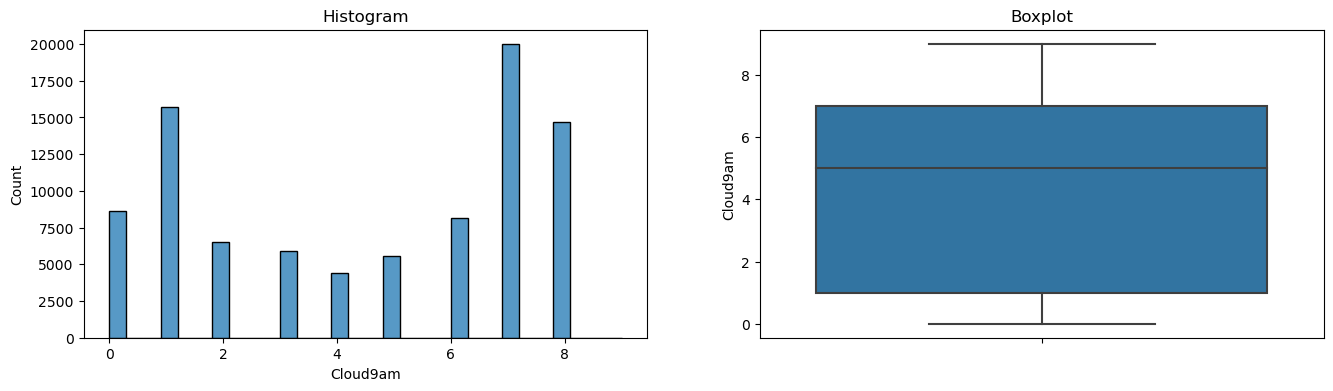

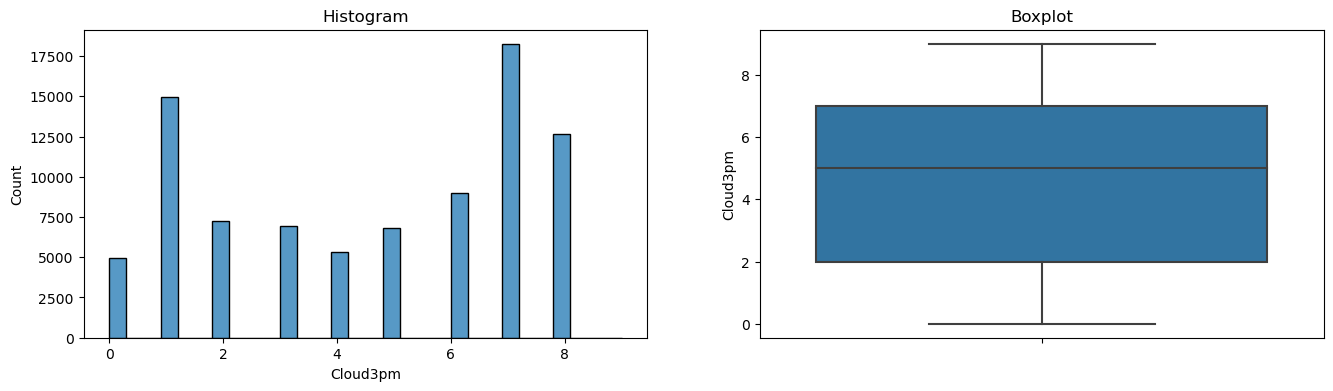

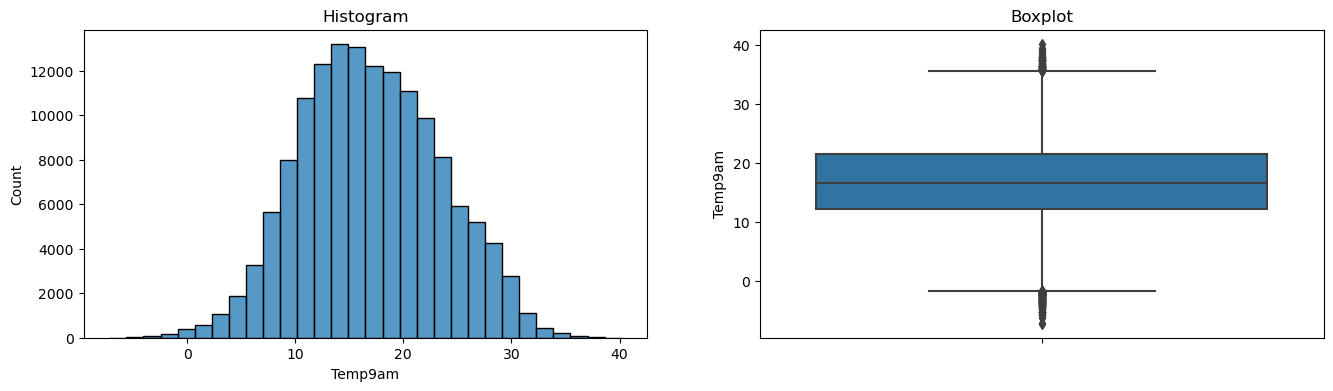

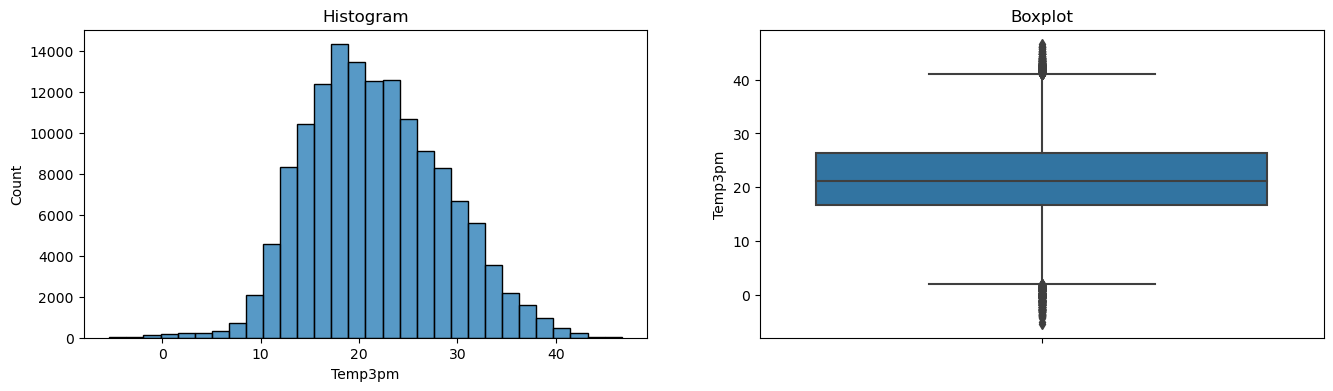

In [ ]:
## Membuat histogram dan boxplot untuk setiap atribut numerikal untuk melihat outliers 
for feature in numerical:
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[feature],bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[feature])
    plt.title('Boxplot')
    
    plt.show()

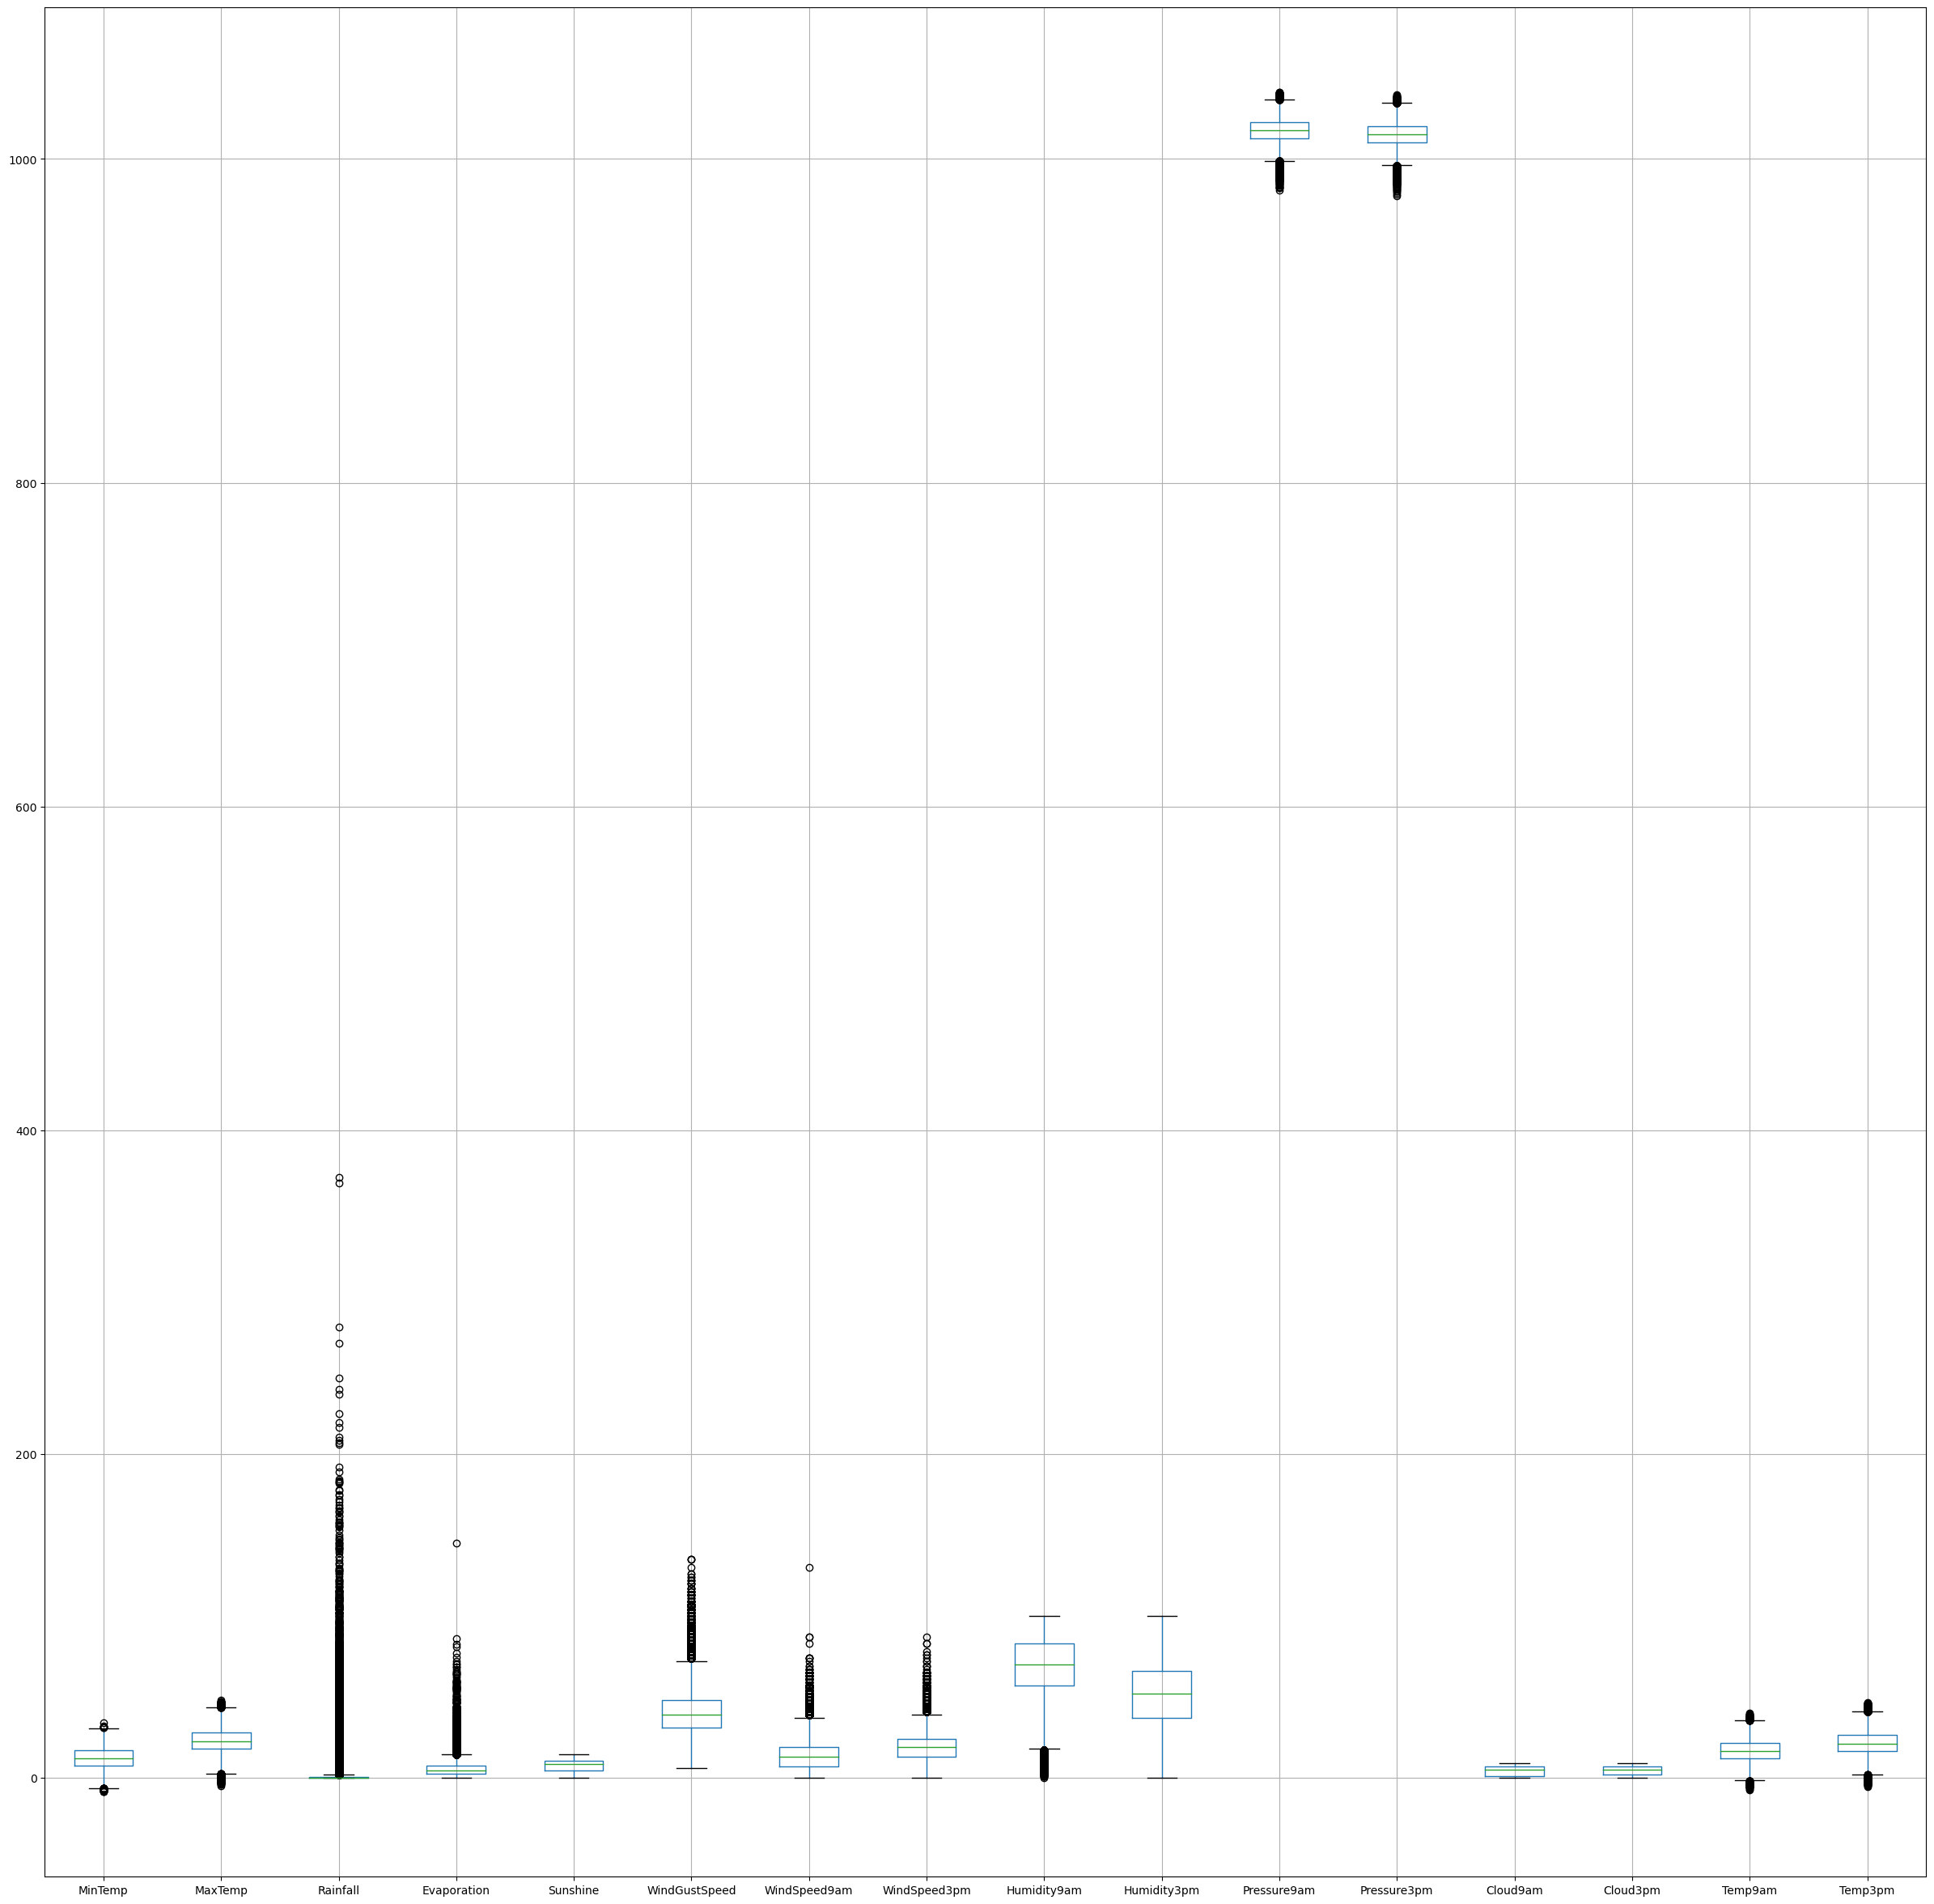

In [ ]:
## Membuat semua boxplot dari atribut numerikal di dalam satu gambar
df[numerical].boxplot(figsize=(30,30))
plt.show()

Boxplot di atas menunjukkan terdapat jumlah outlier yang banyak pada atribut **MinTemp**, **MaxTemp**, **Rainfall**, **Evaporation**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm**, **Humidity9am**, **Pressure9am**, **Pressure3pm**, **Temp9am**, dan **Temp3pm**.

In [ ]:
## Memasukkan atribut-atribut yang memiliki outliers besar pada sebuah variable outlier
outlier = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']
print('outlier :',outlier)


outlier : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
### Handling Outliers dengan IQR
for feature in outlier:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

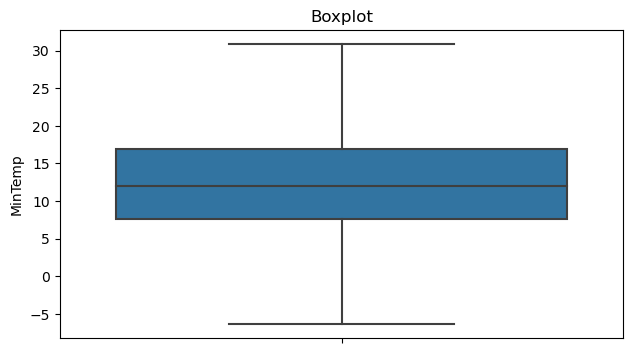

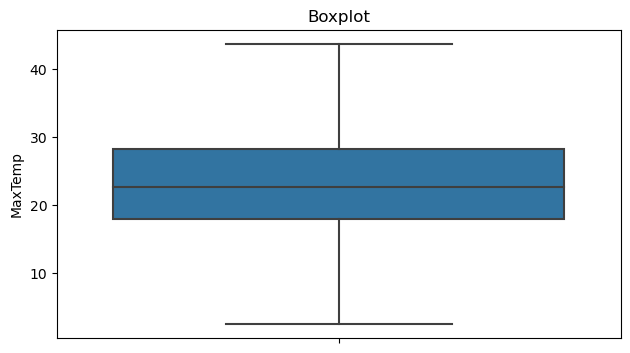

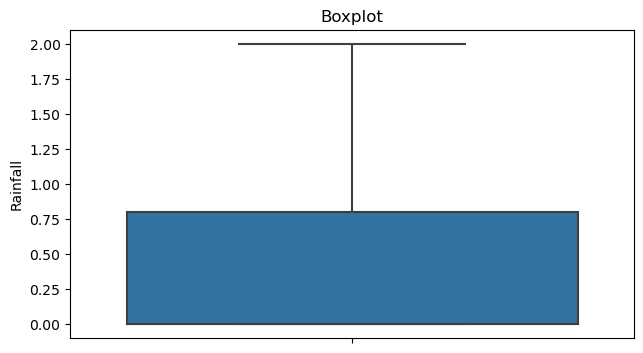

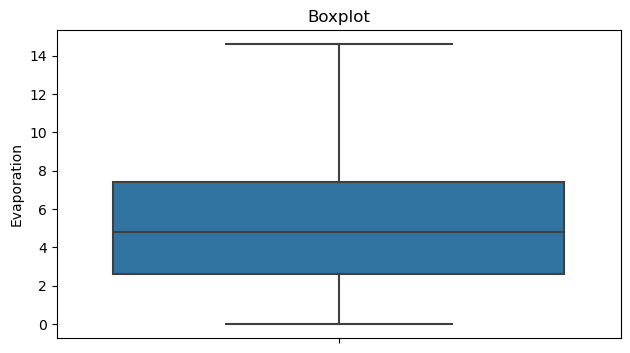

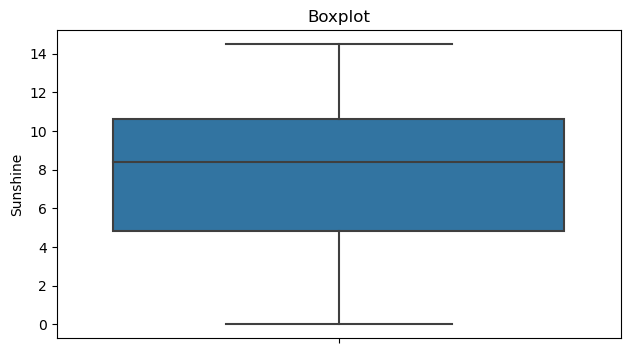

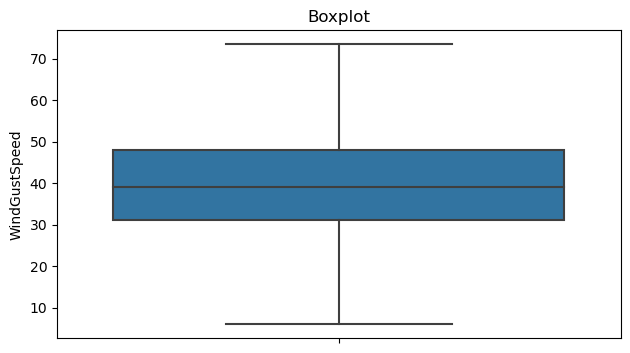

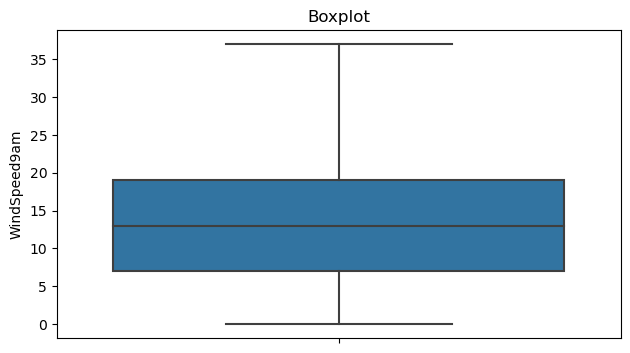

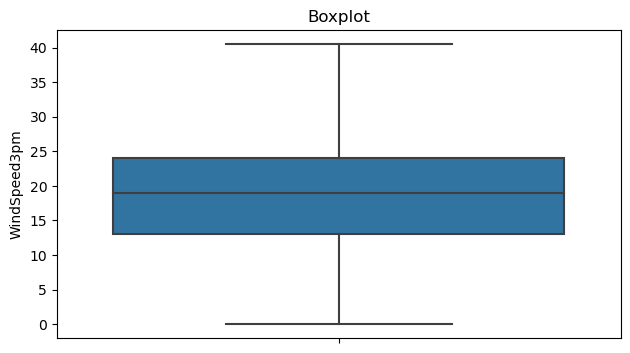

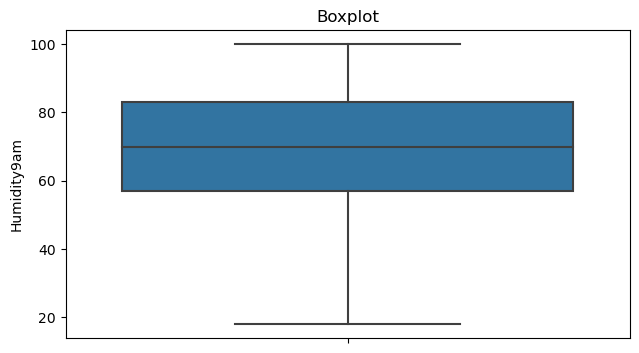

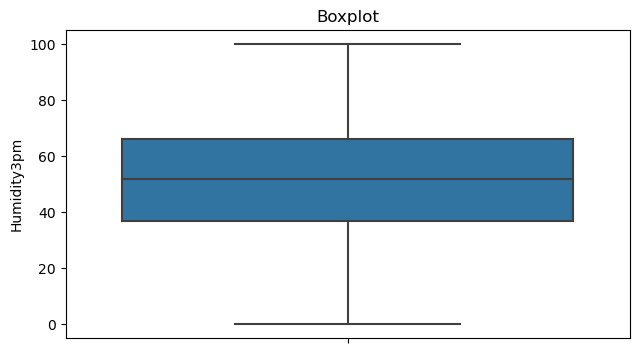

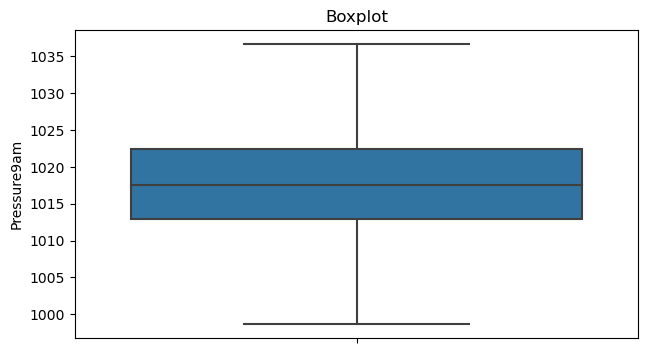

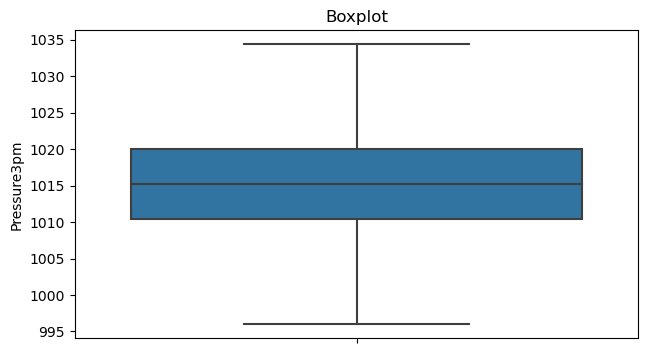

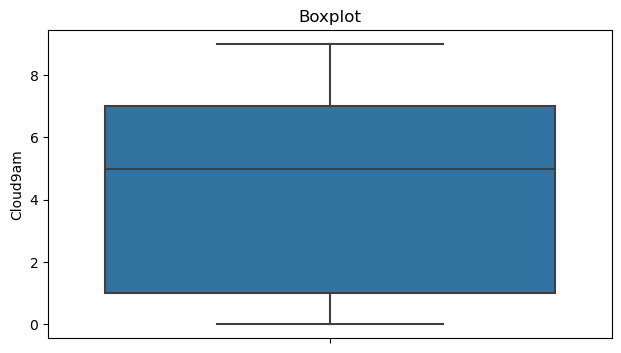

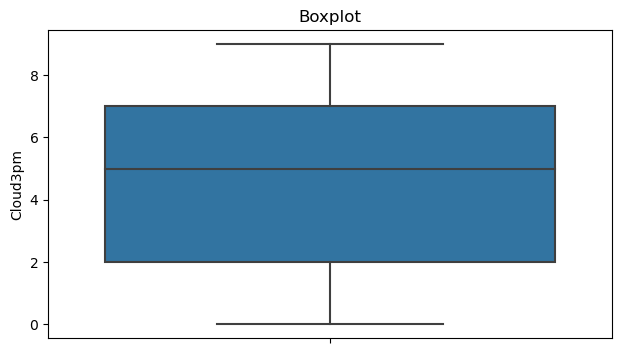

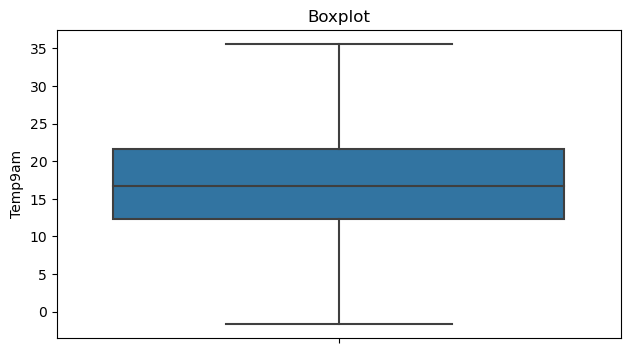

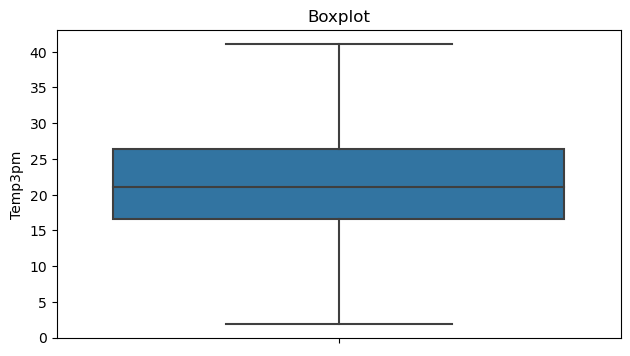

In [ ]:
## Menampilkan boxplot pada tiap atribut numerikal untuk melihat outlier yang sudah dihandling
for feature in numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(y=df[feature])
    plt.title('Boxplot')

In [ ]:
## Mengecek deskripsi statistik dari atribut yang sudah dilakukan handling outliers
df[outlier].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,135197.000000,143693.000000,142398.000000,142806.000000,130395.000000,130432.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,39.837792,13.951313,18.574162,68.933567,1017.670297,1015.269781,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,12.981866,8.607783,8.532467,18.876608,7.025447,6.976954,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,998.650000,996.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,31.000000,7.000000,13.000000,57.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,39.000000,13.000000,19.000000,70.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,48.000000,19.000000,24.000000,83.000000,1022.400000,1020.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,73.500000,37.000000,40.500000,100.000000,1036.650000,1034.400000,35.550000,41.100000


## 4.2 Handling Missing Values

Handling missing values yang akan dilakukan disini adalah dengan mengisi atribut numerikal dengan nilai mean, dan mengisi atribut kategorikal dengan nilai modus

In [ ]:
## Membuat dataframe baru yaitu df2 yang berisi nilai selain nilai variable target
df3 = df.drop(df[df['RainTomorrow'].isnull()].index)

In [ ]:
## Menghitung persentase missing values pada setiap atribut
missing_value = df3.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

Location           0.0 %
Day                0.0 %
RainTomorrow       0.0 %
Month              0.0 %
Year               0.0 %
MaxTemp           0.22 %
MinTemp           0.44 %
Temp9am           0.62 %
WindSpeed9am      0.93 %
RainToday         0.97 %
Rainfall          0.97 %
Humidity9am       1.22 %
WindSpeed3pm      1.81 %
Temp3pm           1.87 %
Humidity3pm       2.48 %
WindDir3pm         2.6 %
Cloud9am         36.89 %
Cloud3pm         39.25 %
Evaporation      41.83 %
Sunshine         46.62 %
WindGustSpeed     6.37 %
WindGustDir       6.41 %
WindDir9am        6.88 %
Pressure3pm       9.61 %
Pressure9am       9.63 %
dtype: object

In [ ]:
## Melakukan handling missing values pada data dalam atribut numerikal dengan mengisi nilai NaN dengan nilai mean dari data
for num_col in numerical:
    df3[num_col].fillna(df3[num_col].mean(),inplace=True)

In [ ]:
## Melakukan pengecekan apakah masih ada data yang null pada atribut numerikal
df3[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
## Melakukan update pada list atribut kategorikal
categorical = list(df.select_dtypes(include=['object']).columns)

In [ ]:
df[categorical]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No


In [ ]:
## Melakukan handling missing values pada data dalam atribut numerikal dengan mengisi nilai NaN dengan nilai modus(mode) dari data
for cat_col in categorical:
    df3[cat_col].fillna(df3[cat_col].mode()[0],inplace=True)

In [ ]:
## Melakukan pengecekan apakah masih ada data yang null pada atribut kategorikal
df3[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
## Melakukan pengecekan nilai null (missing values) pada dataframe df3
df3.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Dataset atau dataframe df3 sudah tidak mempunyai missing values lagi

In [ ]:
## Mengganti nama tiap atribut dari bahasa inggris ke bahasa indonesia
df3 = df3.rename(columns={
    'Location':'Lokasi',
    'MinTemp': 'Suhu_Minimum',
    'MaxTemp': 'Suhu_Maksimum',
    'Rainfall':'Curah_Hujan',
    'Evaporation':'Penguapan',
    'Sunshine':'Sinar_Matahari',
    'WindGustDir':'Arah_Angin',
    'WindGustSpeed':'Kecepatan_Angin',
    'WindDir9am':'Arah_Angin_9Pagi',
    'WindDir3pm':'Arah_Angin_3Sore',
    'WindSpeed9am':'Kecepatan_Angin_9Pagi',
    'WindSpeed3pm':'Kecepatan_Angin_3Sore',
    'Humidity9am':'Kelembapan_9Pagi',
    'Humidity3pm':'Kelembapan_3Sore',
    'Pressure9am':'Tekanan_Udara_9Pagi',
    'Pressure3pm':'Tekanan_Udara_3Sore',
    'Cloud9am':'Awan_9Pagi',
    'Cloud3pm':'Awan_3Sore',
    'Temp9am':'Suhu_9Pagi',
    'Temp3pm':'Suhu_3Sore',
    'RainToday':'Hari_ini_Hujan',
    'RainTomorrow':'Hari_besok_Hujan',
    'Day':'Hari',
    'Month':'Bulan',
    'Year':'Tahun'})

In [ ]:
df3

,Lokasi,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,...,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,Albury,13.4,22.9,0.6,5.321137,7.624853,W,44.0,W,WNW,...,1007.1,8.000000,4.503167,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.321137,7.624853,WNW,44.0,NNW,WSW,...,1007.8,4.437189,4.503167,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.321137,7.624853,WSW,46.0,W,WSW,...,1008.7,4.437189,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.321137,7.624853,NE,24.0,SE,E,...,1012.8,4.437189,4.503167,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.321137,7.624853,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,5.321137,7.624853,E,31.0,ESE,E,...,1021.2,4.437189,4.503167,9.4,20.9,No,No,20,6,2017
145455,Uluru,2.8,23.4,0.0,5.321137,7.624853,E,31.0,SE,ENE,...,1020.3,4.437189,4.503167,10.1,22.4,No,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,5.321137,7.624853,NNW,22.0,SE,N,...,1019.1,4.437189,4.503167,10.9,24.5,No,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,5.321137,7.624853,N,37.0,SE,WNW,...,1016.8,4.437189,4.503167,12.5,26.1,No,No,23,6,2017


# 5. EKSPLORASI DATA

## 5.1 Descriptive Statistics & Query

In [ ]:
df3.describe()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembapan_9Pagi,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186549,23.229947,0.485723,5.321137,7.624853,39.789209,13.912024,18.549386,68.897257,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.988469,21.689812,15.715084,6.402544,2012.758926
std,6.388173,7.091985,0.787927,2.585528,2.734927,12.540045,8.550996,8.447055,18.778693,20.532065,6.668626,6.623879,2.278080,2.104709,6.465182,6.844153,8.798150,3.426506,2.541256
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.700000,0.000000,5.321137,7.624853,39.000000,13.000000,18.549386,70.000000,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.800000,21.300000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000,31.000000,12.000000,2017.000000


Diperoleh bahwa:

- Curah hujan rata-rata 0.48
- Kecepatan angin rata-rata berada pada 39.73
- Suhu terendah pada suhu minimum mencapai -6.35 derajat
- Suhu tertinggi pada suhu maksimum mencapai 43.65 derajat

In [ ]:
# Memperoleh deskripsi statistik dari kolom-kolom yang memiliki tipe data objek/string.
df3.describe(include="O")

,Lokasi,Arah_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Hari_ini_Hujan,Hari_besok_Hujan
count,142193,142193,142193,142193,142193,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,19110,21406,14441,110738,110316


Dapat diperoleh :
- Terdapat 49 lokasi dengan lokasi paling banyak terletak di Canberra
- Arah angin paling sering adalah W
- Arah angin 9pagi paling sering adalah N
- Arah angin 3sore paling sering adalah SE
- Tidak hujan (No) lebih dominan pada atribut Hari_ini_Hujan dan Hari_besok_Hujan
- Cuaca yang paling sering muncul yakni Overcast

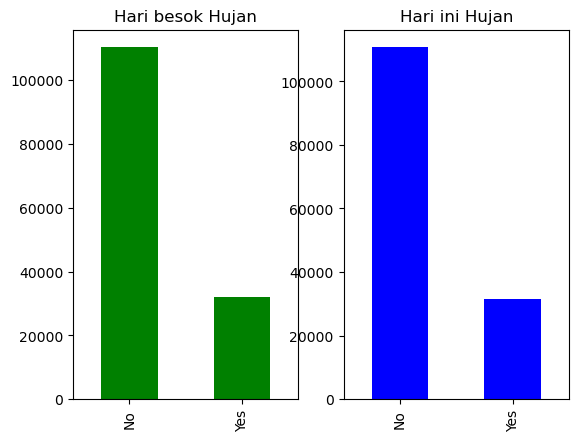

In [ ]:
# Melihat persebaran data pada atribut Hari_ini_Hujan dan atribut target Hari_besok_Hujan
plt.subplot(1,2,1)
df3['Hari_besok_Hujan'].value_counts().plot.bar(color='g')
plt.title('Hari besok Hujan')

plt.subplot(1,2,2)
df3['Hari_ini_Hujan'].value_counts().plot.bar(color='b')
plt.title('Hari ini Hujan')
plt.show()

Dapat dilihat bahwa kedua histogram menunjukkan proporsi yang sama. Pada atribut target Hari_besok_Hujan, terdapat perbedaan yang cukup signifikan antara nilai No dan Yes

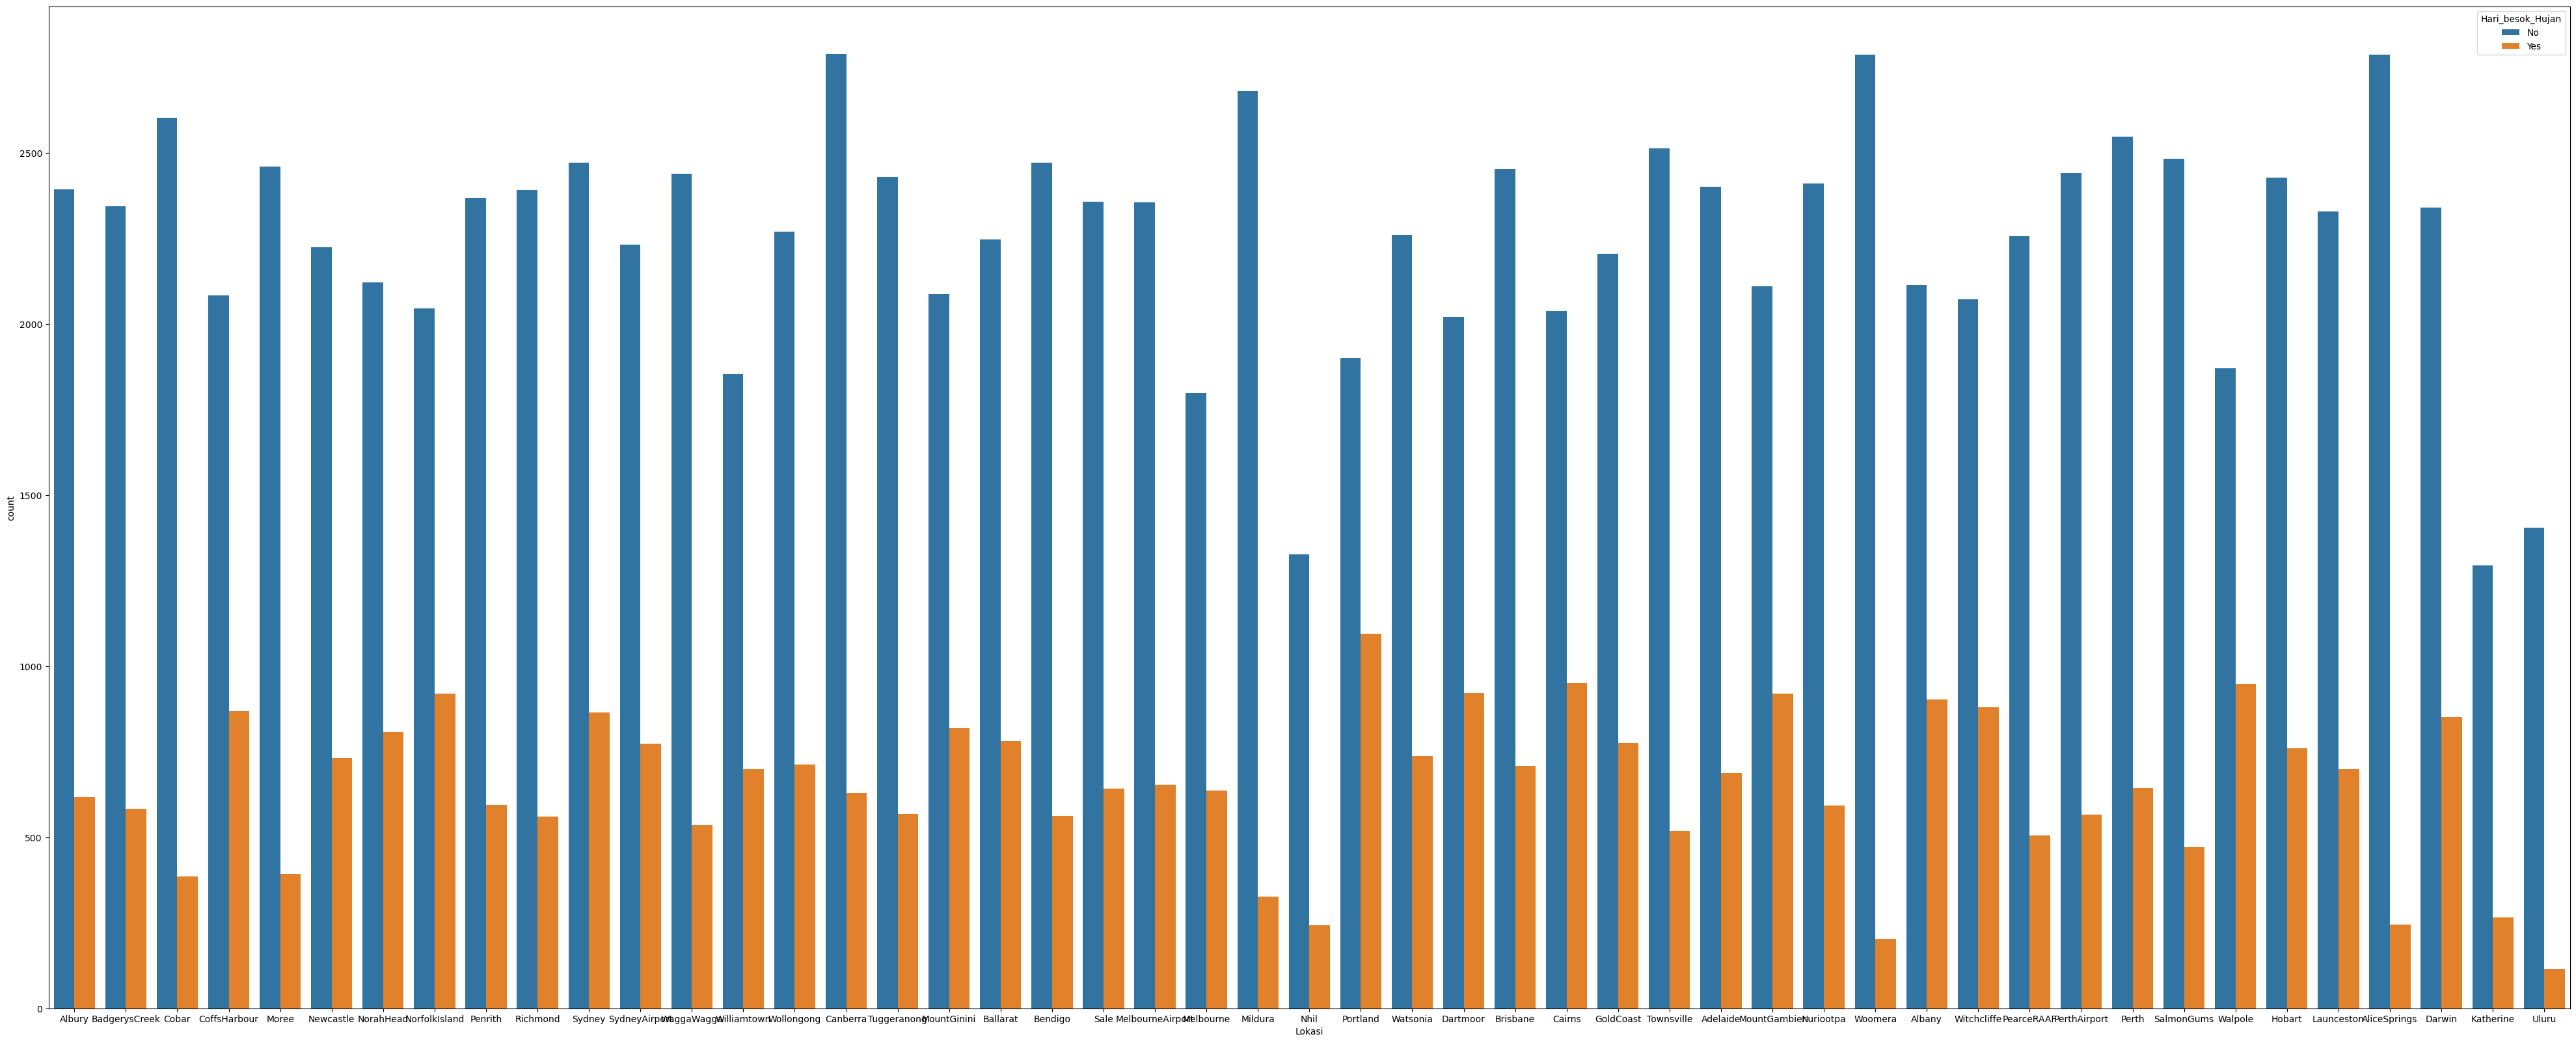

In [ ]:
plt.figure(figsize=(50,20))
ax = sns.countplot(x="Lokasi", hue="Hari_besok_Hujan", data=df3)

Terlihat bahwa Hari_besok_Hujan mempunyai intensitas yang berbeda-beda di setiap lokasi.

## 5.2 Correlation Matrix

In [ ]:
df3.corr()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembapan_9Pagi,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
Suhu_Minimum,1.000000,0.733908,0.051569,0.407321,0.051905,0.181196,0.179000,0.178313,-0.232126,0.005950,-0.429817,-0.438101,0.061463,0.015904,0.898071,0.699777,0.001498,-0.203839,0.039136
Suhu_Maksimum,0.733908,1.000000,-0.256889,0.505265,0.332209,0.073760,0.017461,0.053749,-0.498937,-0.499478,-0.315753,-0.402987,-0.227218,-0.214901,0.880257,0.969844,-0.000459,-0.164514,0.058318
Curah_Hujan,0.051569,-0.256889,1.000000,-0.190328,-0.264463,0.152200,0.102232,0.079996,0.388395,0.407840,-0.180612,-0.095774,0.271590,0.235202,-0.114274,-0.261124,0.003310,0.011886,-0.014851
Penguapan,0.407321,0.505265,-0.190328,1.000000,0.341201,0.171070,0.157940,0.113318,-0.425116,-0.322005,-0.249312,-0.271082,-0.170573,-0.169173,0.480952,0.489357,-0.006505,-0.024539,0.060172
Sinar_Matahari,0.051905,0.332209,-0.264463,0.341201,1.000000,-0.018256,0.008666,0.042939,-0.352476,-0.446849,0.029310,-0.017332,-0.537714,-0.559379,0.210299,0.350266,-0.000848,0.017322,0.008079
Kecepatan_Angin,0.181196,0.073760,0.152200,0.171070,-0.018256,1.000000,0.579150,0.660493,-0.215608,-0.029331,-0.424842,-0.382334,0.050813,0.078488,0.154971,0.039919,-0.009864,0.058393,-0.031185
Kecepatan_Angin_9Pagi,0.179000,0.017461,0.102232,0.157940,0.008666,0.579150,1.000000,0.508507,-0.274166,-0.033276,-0.214205,-0.164554,0.017606,0.039049,0.132855,0.007777,-0.009292,0.051335,-0.020981
Kecepatan_Angin_3Sore,0.178313,0.053749,0.079996,0.113318,0.042939,0.660493,0.508507,1.000000,-0.147419,0.014623,-0.276243,-0.237891,0.040805,0.018127,0.166907,0.032122,-0.010375,0.059649,-0.032741
Kelembapan_9Pagi,-0.232126,-0.498937,0.388395,-0.425116,-0.352476,-0.215608,-0.274166,-0.147419,1.000000,0.659634,0.133287,0.177485,0.354967,0.275090,-0.470027,-0.491326,0.015606,-0.089153,0.010647
Kelembapan_3Sore,0.005950,-0.499478,0.407840,-0.322005,-0.446849,-0.029331,-0.033276,0.014623,0.659634,1.000000,-0.024249,0.050290,0.400006,0.407898,-0.217206,-0.555382,0.013040,-0.018315,-0.008990


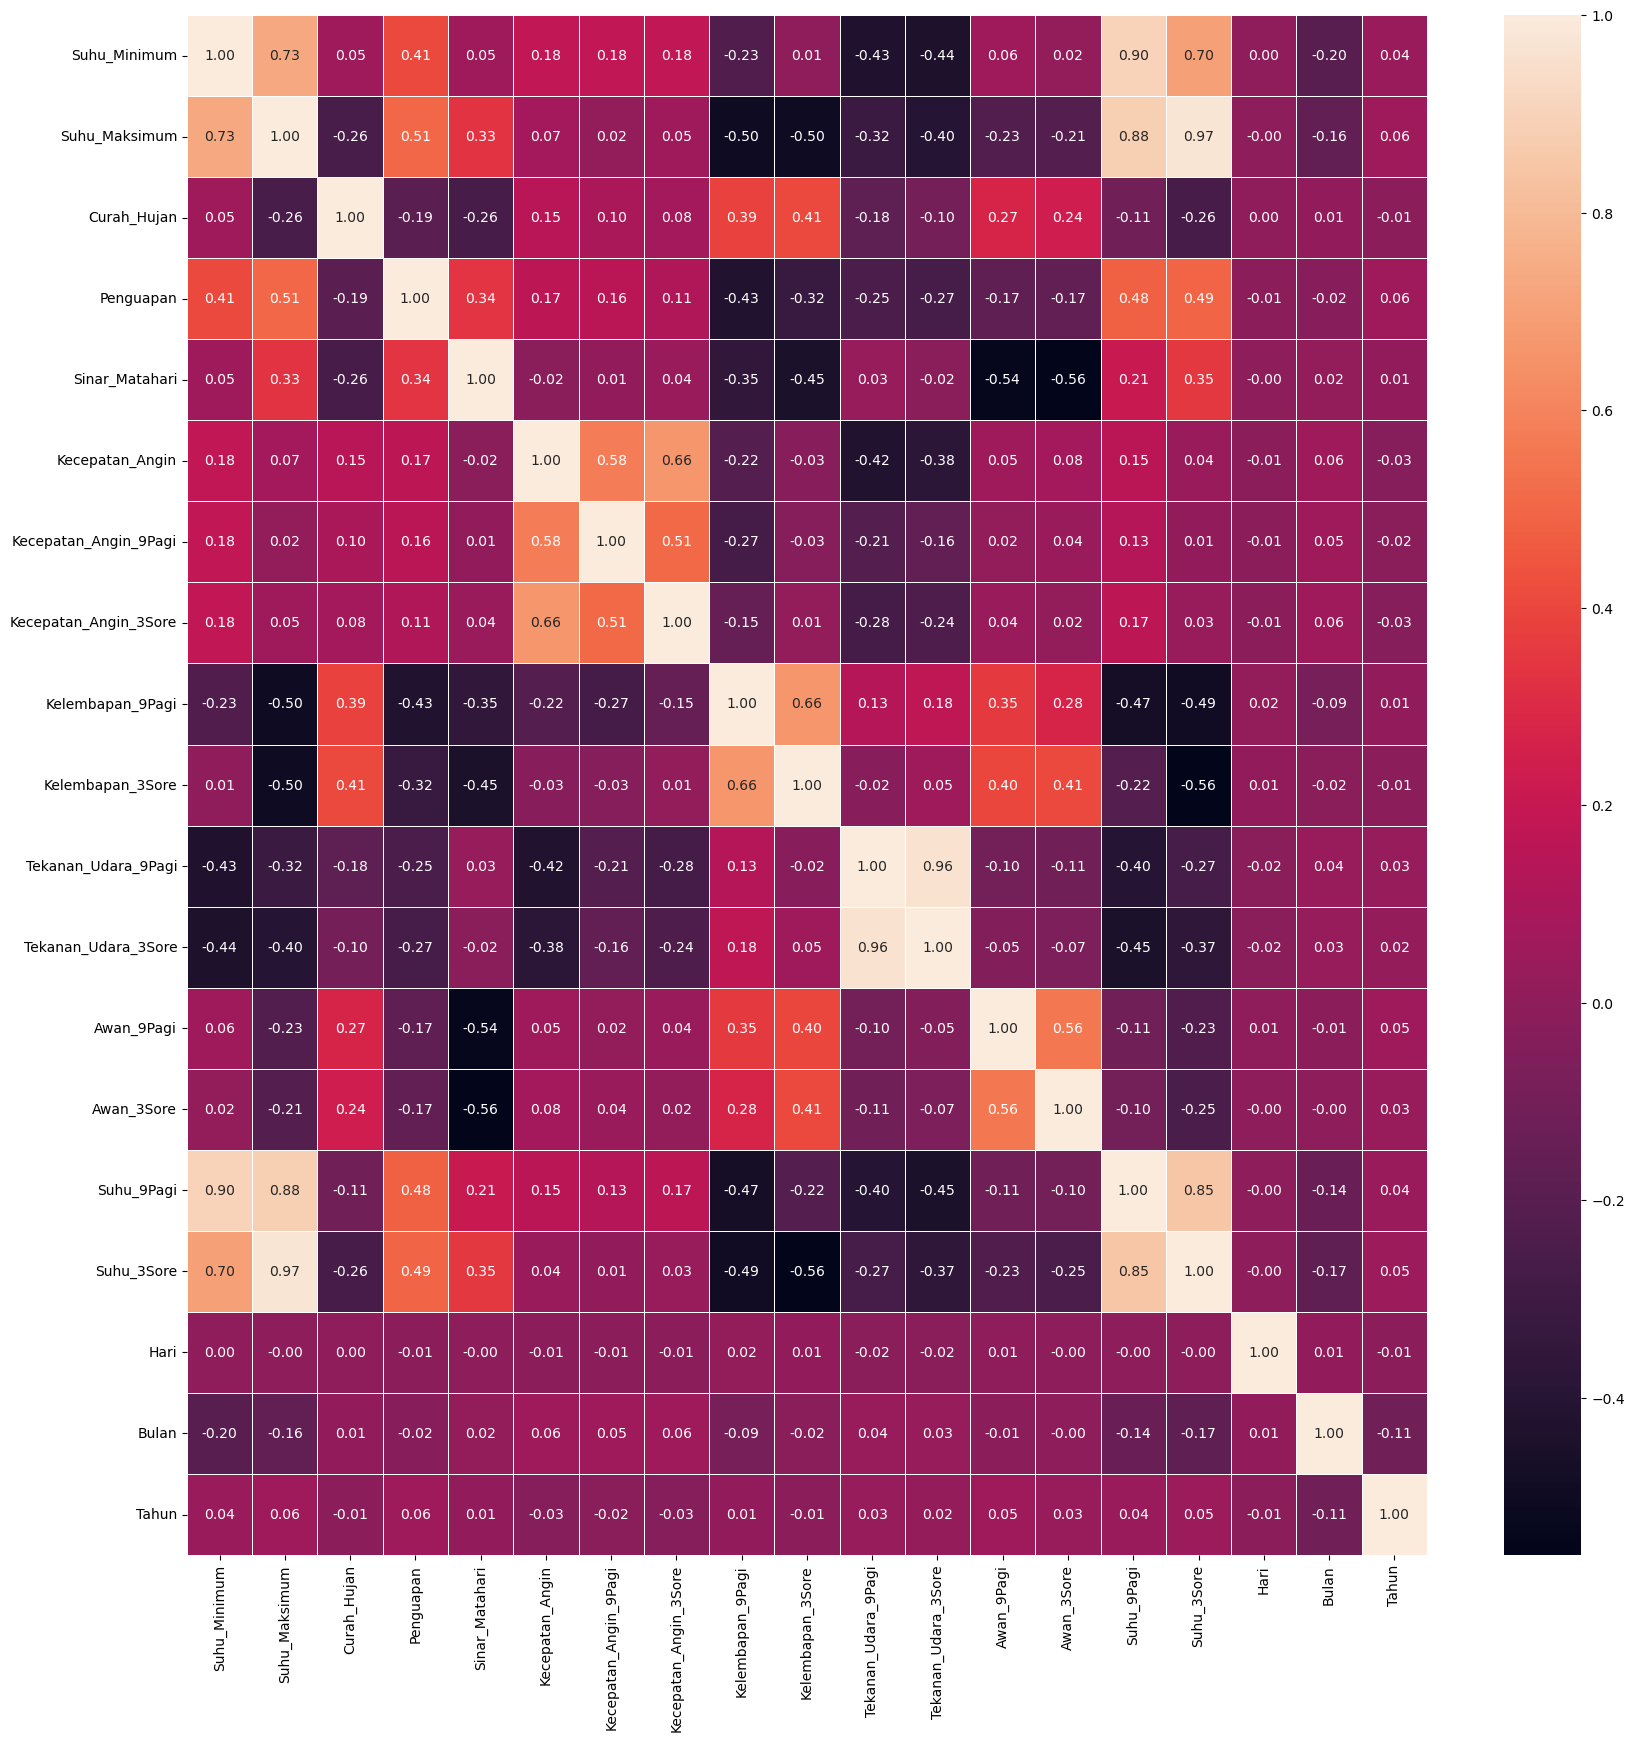

In [ ]:
# Melakukan visualisasi korelasi antar variabel untuk melihat hubungan
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df3.corr(), linewidths = .5, annot=True, fmt='.2f')

dapat dilihat bahwa terdapat korelasi yang tinggi (>0,8) diantara atribut Tekanan_Udara_3Sore dan Tekanan_Udara_9Pagi, , Suhu_Maksimum dan Suhu_3Sore, Suhu_Minimum dan Suhu_Maksimum, Suhu_9Pagi dan Suhu_Maksimum, yang berarti atribut tsb merepresentasikan informasi yang sama. Oleh karena itu, harus dikeluarkan salah satu

In [ ]:
df4 = df3.drop(['Tekanan_Udara_3Sore','Suhu_Maksimum','Suhu_9Pagi'],axis = 1)

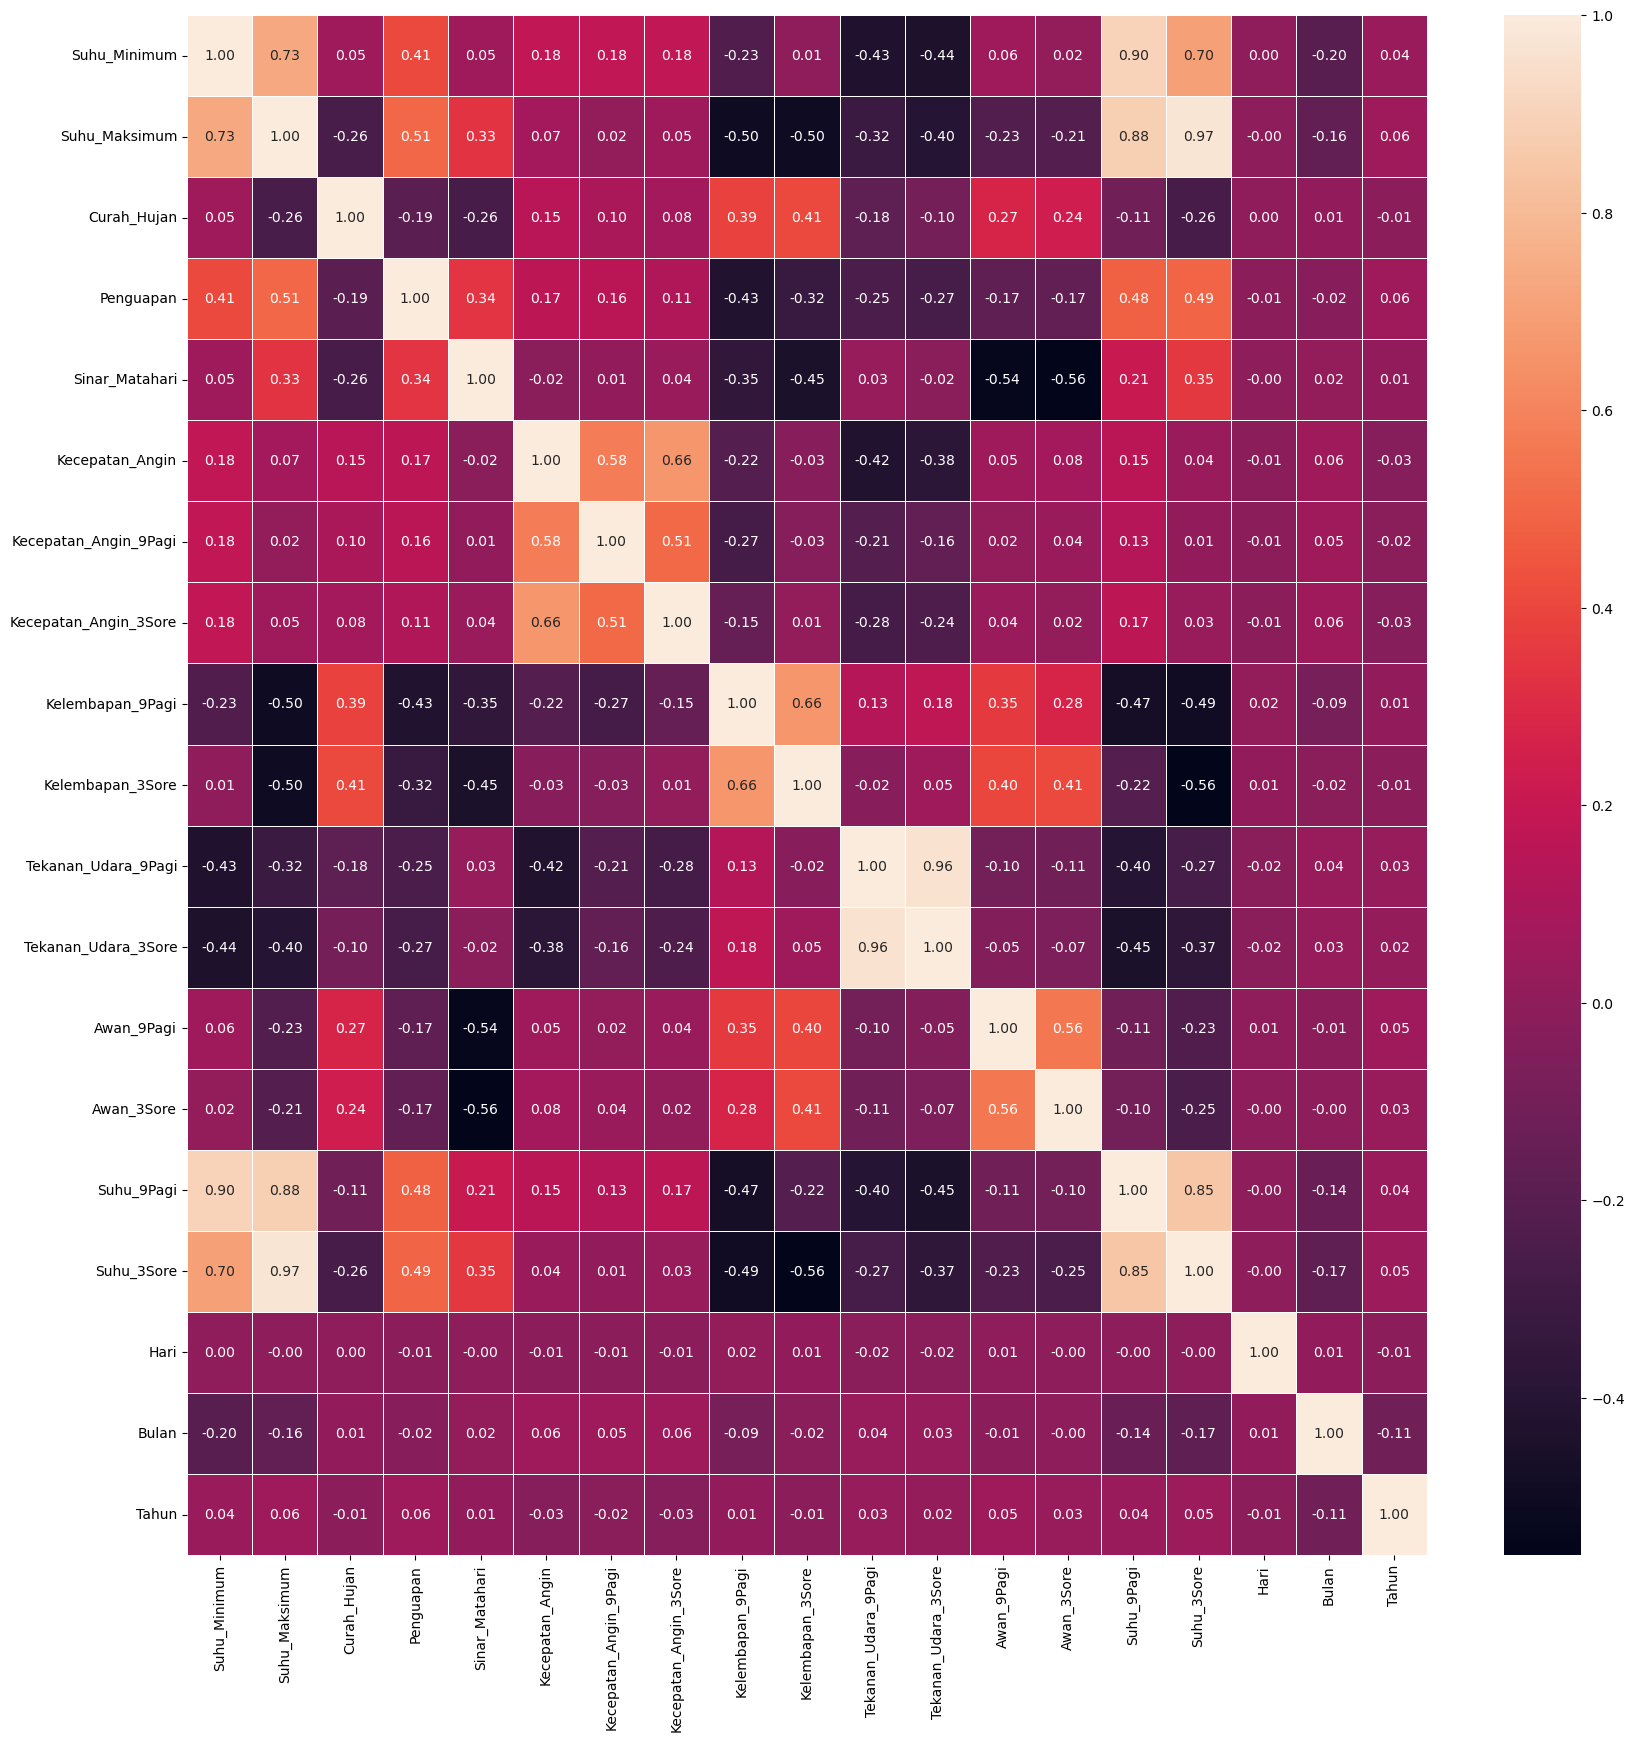

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df3.corr(), linewidths = .5, annot=True, fmt='.2f')

In [ ]:
#Menampilkan nama kolom
df4.columns

Index(['Lokasi', 'Suhu_Minimum', 'Curah_Hujan', 'Penguapan', 'Sinar_Matahari',
       'Arah_Angin', 'Kecepatan_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore',
       'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembapan_9Pagi',
       'Kelembapan_3Sore', 'Tekanan_Udara_9Pagi', 'Awan_9Pagi', 'Awan_3Sore',
       'Suhu_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan', 'Hari', 'Bulan',
       'Tahun'],
      dtype='object')

# 6. DATA PREPROCESSING

In [ ]:
# Memperbarui list atribut bertipe numerik dan kategorik
categorical = [i for i in df4.columns if df4[i].dtypes == 'O']
numerical = [i for i in df4.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Lokasi', 'Arah_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan']
numerical : ['Suhu_Minimum', 'Curah_Hujan', 'Penguapan', 'Sinar_Matahari', 'Kecepatan_Angin', 'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembapan_9Pagi', 'Kelembapan_3Sore', 'Tekanan_Udara_9Pagi', 'Awan_9Pagi', 'Awan_3Sore', 'Suhu_3Sore', 'Hari', 'Bulan', 'Tahun']


## 6.1 Encoding Data Columns

In [ ]:
# Encoding atribut kategorik menggunakan replace function pada atribut bertipe Object
df4['Hari_ini_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)
df4['Hari_besok_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)

In [ ]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df4[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [ ]:
df4['Arah_Angin'].replace(encode_data('Arah_Angin'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [ ]:
df4['Arah_Angin_9Pagi'].replace(encode_data('Arah_Angin_9Pagi'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [ ]:
df4['Arah_Angin_3Sore'].replace(encode_data('Arah_Angin_3Sore'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [ ]:
df4['Lokasi'].replace(encode_data('Lokasi'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [ ]:
#Menampilkan 5 data teratas
df4.head()

,Lokasi,Suhu_Minimum,Curah_Hujan,Penguapan,Sinar_Matahari,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,...,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Awan_9Pagi,Awan_3Sore,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,0,13.4,0.6,5.321137,7.624853,0,44.0,0,0,20.0,...,22.0,1007.7,8.000000,4.503167,21.8,0,0,1,12,2008
1,0,7.4,0.0,5.321137,7.624853,1,44.0,1,1,4.0,...,25.0,1010.6,4.437189,4.503167,24.3,0,0,2,12,2008
2,0,12.9,0.0,5.321137,7.624853,2,46.0,0,1,19.0,...,30.0,1007.6,4.437189,2.000000,23.2,0,0,3,12,2008
3,0,9.2,0.0,5.321137,7.624853,3,24.0,2,2,11.0,...,16.0,1017.6,4.437189,4.503167,26.5,0,0,4,12,2008
4,0,17.5,1.0,5.321137,7.624853,0,41.0,3,3,7.0,...,33.0,1010.8,7.000000,8.000000,29.7,0,0,5,12,2008


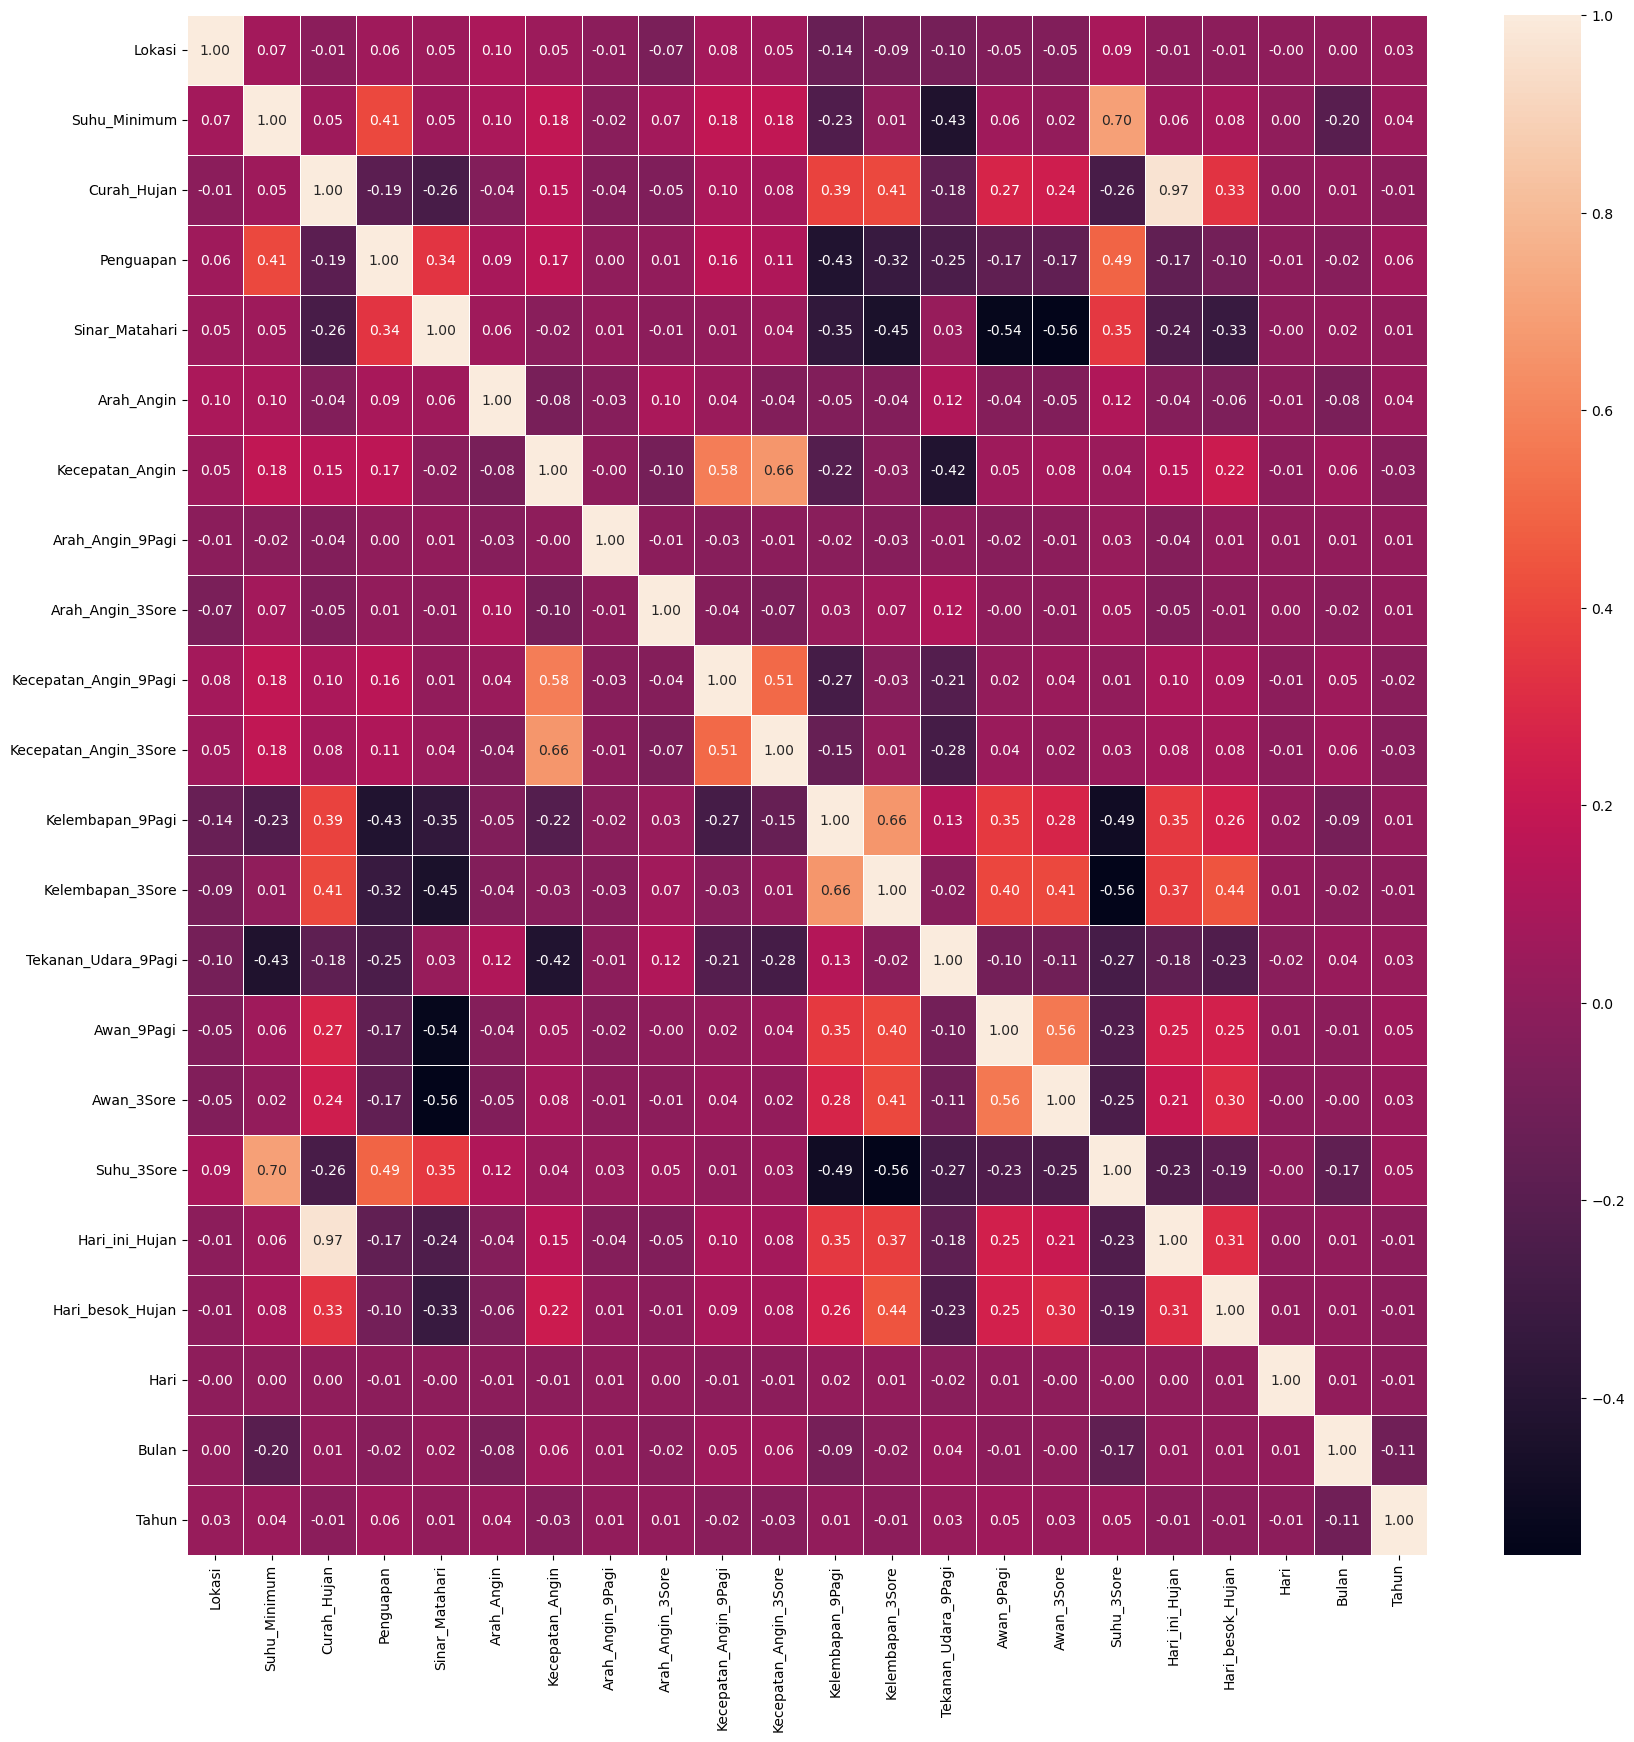

In [ ]:
# Mengecek ulang korelasi
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df4.corr(), linewidths = .5, annot=True, fmt='.2f')

dapat Diperoleh bahwa: 
- Atribut Lokasi, Penguapan,Arah_Angin, Arah_Angin_3Sore, Tekanan_Udara_9Pagi, Suhu_3Sore, dan Tahun berkorelasi negatif dengan atribut target (Hari_besok_Hujan)
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap Hari_besok_Hujan.
- Atribut yang berkorelasi cukup tinggi dengan atribut Hari_besok_Hujan adalah Kelembaban_3Sore, Curah_Hujan, dan Hari_ini_Hujan

## 6.2 Feature Selection

In [ ]:
X = df4.drop(['Hari_besok_Hujan'], axis=1)
y = df4['Hari_besok_Hujan']
print(X.shape)
print(y.shape)

(142193, 21)
(142193,)


In [ ]:
# Melakukan feature selection menggunakan library F regression dengan k=12
topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
                 Features         Score
12       Kelembapan_3Sore  34075.278364
2             Curah_Hujan  17421.142548
4          Sinar_Matahari  17028.156036
17         Hari_ini_Hujan  14748.527720
15             Awan_3Sore  14253.376047
11       Kelembapan_9Pagi   9967.937562
14             Awan_9Pagi   9792.354704
13    Tekanan_Udara_9Pagi   8136.381735
6         Kecepatan_Angin   7456.376827
16             Suhu_3Sore   5335.649189
3               Penguapan   1463.570352
9   Kecepatan_Angin_9Pagi   1125.053312


Dengan menggunakan library F regression juga didapatkan bahwa 12 feature yang paling berpengaruh dalam model yaitu Kelembapan_3Sore,Curah_Hujan, Sinar_Matahari, Hari_Ini_Hujan, Awan3_Sore, Kelembapan_9Pagi, Awan_9Pagi,Tekanan_Udara_9Pagi, Kecepatan_Angin, Suhu_3Sore, Penguapan dan Kecepatan_Angin_9Pagi.

In [ ]:
# Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan
X_fit = df4[['Kelembapan_3Sore','Curah_Hujan','Sinar_Matahari','Hari_ini_Hujan','Awan_3Sore',
            'Kelembapan_9Pagi','Awan_9Pagi','Tekanan_Udara_9Pagi','Kecepatan_Angin','Suhu_3Sore','Penguapan','Kecepatan_Angin_9Pagi']]

In [ ]:
# Melihat 5 Baris teratas
X_fit.head()

,Kelembapan_3Sore,Curah_Hujan,Sinar_Matahari,Hari_ini_Hujan,Awan_3Sore,Kelembapan_9Pagi,Awan_9Pagi,Tekanan_Udara_9Pagi,Kecepatan_Angin,Suhu_3Sore,Penguapan,Kecepatan_Angin_9Pagi
0,22.0,0.6,7.624853,0,4.503167,71.0,8.000000,1007.7,44.0,21.8,5.321137,20.0
1,25.0,0.0,7.624853,0,4.503167,44.0,4.437189,1010.6,44.0,24.3,5.321137,4.0
2,30.0,0.0,7.624853,0,2.000000,38.0,4.437189,1007.6,46.0,23.2,5.321137,19.0
3,16.0,0.0,7.624853,0,4.503167,45.0,4.437189,1017.6,24.0,26.5,5.321137,11.0
4,33.0,1.0,7.624853,0,8.000000,82.0,7.000000,1010.8,41.0,29.7,5.321137,7.0


In [ ]:
# melihat informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit
X_fit.info()
X_fit.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Kelembapan_3Sore       142193 non-null  float64
 1   Curah_Hujan            142193 non-null  float64
 2   Sinar_Matahari         142193 non-null  float64
 3   Hari_ini_Hujan         142193 non-null  int64  
 4   Awan_3Sore             142193 non-null  float64
 5   Kelembapan_9Pagi       142193 non-null  float64
 6   Awan_9Pagi             142193 non-null  float64
 7   Tekanan_Udara_9Pagi    142193 non-null  float64
 8   Kecepatan_Angin        142193 non-null  float64
 9   Suhu_3Sore             142193 non-null  float64
 10  Penguapan              142193 non-null  float64
 11  Kecepatan_Angin_9Pagi  142193 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 14.1 MB


(142193, 12)

Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 70% (0.70) dan Testing data sebesar 30% (0.30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.30, random_state=13)

In [ ]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(99535, 12)
(42658, 12)


Berdasarkan pembagian proporsi training data/data latih dan testing data/data uji, didapatkan jumlah data training dari keseluruhan data sebanyak 99535 data, serta data testing sebanyak 42658 data.

# 7. PENDEFINISIAN MODEL

## 7.1 Model Logistic Regression

 Logistic regression dapat digunakan untuk klasifikasi biner, yaitu ketika target variabel hanya memiliki dua kelas. Contoh penggunaannya adalah dalam kasus klasifikasi email spam atau non-spam, di mana target variabel adalah "spam" atau "non-spam". Logistic regression juga dapat digunakan untuk klasifikasi multikelas, yaitu ketika target variabel memiliki lebih dari dua kelas. Contoh penggunaannya adalah dalam kasus klasifikasi jenis bunga, di mana target variabel adalah "setosa", "versicolor", atau "virginica". Selain itu dapat digunakan untuk memprediksi probabilitas suatu kejadian

In [ ]:
# Membuat model logistic regression
# Solver digunakan untuk menentukan algoritma yang digunakan oleh model untuk meminimalkan fungsi kerugian dan memperkirakan parameter model. 
logreg = LogisticRegression(solver='liblinear', random_state=0)

## 7.2 Model Support Vector Machines (SVM)

SVM dapat digunakan untuk menangani dataset yang memiliki banyak fitur dan fitur yang sangat kompleks. SVM bekerja dengan baik pada dataset yang relatif kecil, dan dapat memberikan hasil yang lebih akurat dan lebih cepat daripada algoritma machine learning lainnya, dan SVM dapat dengan mudah diimplementasikan di Python dengan menggunakan library seperti scikit-learn.

In [ ]:
# Membuat model SVM
svm = SVC(kernel='linear')

# 8. PELATIHAN MODEL

## 8.1 Model Logistic Regression

In [ ]:
lg = logreg.fit(X_train, y_train)
lg

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Memeriksa output model 
lg.classes_

array([0, 1], dtype=int64)

In [ ]:
# Memeriksa intercept model dan koefisien model
# intercept adalah nilai konstan pada model dan menunjukkan nilai prediksi variabel dependen ketika semua variabel independen bernilai nol. 
# Koefisien menunjukkan seberapa besar perubahan pada variabel independen akan mempengaruhi nilai prediksi variabel dependen.
print(lg.intercept_, lg.coef_)

[-1.81403247] [[ 1.07627241  0.46174922 -0.33776089 -0.22599136  0.26046853  0.04882174
  -0.00210043 -0.34017359  0.59442043  0.16064985 -0.01591602 -0.20577818]]


## 8.2 Model Support Vector Machines (SVM)

In [ ]:
svm = svm.fit(X_train, y_train)
svm

SVC(kernel='linear')

In [ ]:
# Memeriksa output model 
svm.classes_

# 9. EVALUASI MODEL

Pada bagian ini, dilakukan evaluasi model yang menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa model.

## 9.1 Model Logistic Regression

In [ ]:
#Memeriksa performa dengan .prdict_proba()
logreg.predict_proba(X_test)
#Melihat predicted outputs dengan .predict()
y_pred_logreg = logreg.predict(X_test)
#Melihat nilai akurasi
print("Test score:", logreg.score(X_test, y_test))
print("Train score:", logreg.score(X_train, y_train))

Test score: 0.8433822495194336
Train score: 0.8380670116039584


Berdasarkan score diatas diperoleh nilai akurasi dari test data ialah $0.8433822495194336 \approx 0.843 = 84.3$%, sedangkan nilai akurasi dari train test sebesar $0.8380670116039584 \approx 0.838 = 83.8$%.

In [ ]:
#Confusion matriks
confusion_matrix(y_test, y_pred_logreg)

array([[31337,  1799],
       [ 4882,  4640]], dtype=int64)

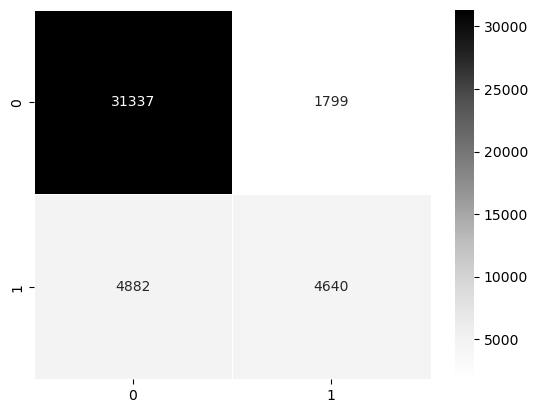

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     33136
           1       0.72      0.49      0.58      9522

    accuracy                           0.84     42658
   macro avg       0.79      0.72      0.74     42658
weighted avg       0.83      0.84      0.83     42658



In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Greys')
plt.show()
print(classification_report(y_test, y_pred_logreg))

Berdasarkan hasil confusion matrix diperoleh bahwa  nilai TP (True Positive) ialah 31337, FP (False Positive) ialah 1799, FN (False Negative) ialah 4882, dan TN (True Negative) ialah 4640.

In [ ]:
#Summary evaluasi model
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Presisi :', precision_score(y_test,y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

Ringkasan Evaluasi Model
Akurasi : 0.8433822495194336
Presisi : 0.7206087901848113
Recall : 0.4872925855912623
F1 Score : 0.5814172044358124


## 9.2 Model Support Vector Machines

In [ ]:
#Melihat predicted outputs dengan .predict()
y_pred_svm = svm.predict(X_test)
#Melihat nilai akurasi dengan .score
print("Test score:", svm.score(X_test, y_test))
print("Train score:", svm.score(X_train, y_train))

Test score: 0.8428665197618266
Train score: 0.8380067313005476


Berdasarkan score diatas diperoleh nilai akurasi dari test data ialah $0.8428665197618266 \approx 0.842 = 84.2$%, sedangkan nilai akurasi dari train test sebesar $0.8380067313005476 \approx 0.838 = 83.8$%.

In [ ]:
#Confusion matriks
confusion_matrix(y_test, y_pred_svm)

array([[31579,  1557],
       [ 5146,  4376]], dtype=int64)

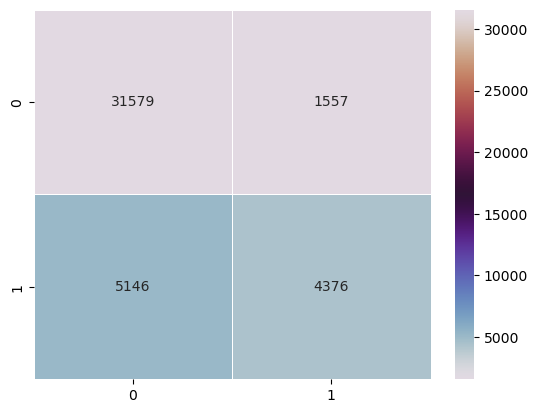

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33136
           1       0.74      0.46      0.57      9522

    accuracy                           0.84     42658
   macro avg       0.80      0.71      0.74     42658
weighted avg       0.83      0.84      0.83     42658



In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'twilight')
plt.show()
print(classification_report(y_test, y_pred_svm))

Berdasarkan hasil confusion matrix diperoleh bahwa nilai TP (True Positive) ialah 31579, FP (False Positive) ialah 1557, FN (False Negative) ialah 5146, dan TN (True Negative) adalah 4376.

In [ ]:
#Summary evaluasi model
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.8428665197618266
Presisi : 0.7375695263778864
Recall : 0.4595673177903802
F1 Score : 0.5662892267874474


- Nilai akurasi dari model logistic regression dan SVM tidak jauh berbeda, keduanya memiliki nilai akurasi sebesar 84% yang mana kedua hasil tersebut cukup baik untuk dilakukan prediksi hujan di Australia.
- Nilai Akurasi, Recall model, dan F1 Score model logistic regression lebih unggul daripada model SVM sedangkan nilai presisi SVM lebih unggul daripada model logistic regression.

# 10. MODEL INFERENCE

In [ ]:
Lokasi = input("Lokasi : ")
TempMin = float(input("Suhu Minimal : "))
TempMax = float(input("Suhu Maksimal : "))
CurahHujan = float(input("Curah Hujan : "))
Evaporasi = float(input("Evaporasi : "))
SinarMatahari = float(input("Sinar Matahari : "))
KecepatanAngin = float(input("Kecepatan Angin : "))
Kelembapan9am = float(input("Kelembapan Pukul 9 am : "))
Kelembapan3pm = float(input("Kelembapan Pukul 3 pm : "))
Awan9am = float(input("Awan Pukul 9 am : "))
Awan3pm = float(input("Awan Pukul 3 pm : "))
HujanHariIni = input("Hari ini Hujan? (Yes/No) : ")

val = [TempMin, TempMax, CurahHujan, Evaporasi, SinarMatahari, KecepatanAngin, Kelembapan9am, Kelembapan3pm, Awan9am, Awan3pm]

loc = {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 
       'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 
       'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 
       'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 
       'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 
       'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 
       'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}

for i in range(0,48):
    if loc[Lokasi]==i:
        val.append(1.0)
    else:
        next

hujan = {'No':0, 'Yes': 1}

for i in range(0,2):
    if hujan[HujanHariIni]==i:
        val.append(1.0)
    else:
        next
        
print(val)

predict_logreg = logreg.predict([val])
predict_svm = svm.predict([val])

if predict_logreg == 0 : 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan")
    
if predict_svm == 0 :
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan")

Lokasi : Cobar
Suhu Minimal : 23.4
Suhu Maksimal : 59.7
Curah Hujan : 2
Evaporasi : 3
Sinar Matahari : 5
Kecepatan Angin : 1
Kelembapan Pukul 9 am : 7
Kelembapan Pukul 3 pm : 5
Awan Pukul 9 am : 2
Awan Pukul 3 pm : 6
Hari ini Hujan? (Yes/No) : No
[23.4, 59.7, 2.0, 3.0, 5.0, 1.0, 7.0, 5.0, 2.0, 6.0, 1.0, 1.0]
Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan
Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan
